# imports

In [61]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact, mannwhitneyu
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold, adjusted_roundup
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist, euclidean


from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from SampleLists.SampleFileFunctions import *
from PhenotypicData.PhenotypeGenerationFunctions import *
from CardioProject.CardioFunctions import *
from PredictionPipeline.PredictionFunctions import *
from TCR_feature_generation.SubsamplingFunctions import *

import os
from Utils import cacheOnDisk, Load
from queue.qp import qp,fakeqp
from addloglevels import sethandlers

#ML imports:
from xgboost import XGBClassifier
import lightgbm as lgb
from collections import OrderedDict
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
import shap
from sklearn import metrics, preprocessing
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126

pd.set_option('display.expand_frame_repr', False)


In [7]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'14032019'

# Analyze 9 samples, without replicates
for samples that have replicates, I choose one randomly

## generate featureDF

In [8]:
datasetFolder='%s/TCR_real_data/RavidSamples2' %MyPath
datasetName='RavidSamples2'

complete_TCRfeatureExtractionForDataset(datasetFolder,datasetName, ss=None,repeat=None,samp_size_nt=400,samp_size_aa=200)


TCR_real_data/RavidSamples2
step 1: feature extraction (long)
number of samples for feature extraction is 9
0 MB38011ravid2
Total
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...
found clonality features for this sample...
found diversityFeatures for this sample...
Prod
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...
found clonality features for this sample...
found diversityFeatures for this sample...
nonProd
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...
found clonality features for this sample...
found diversityFeatures for this sample...
counting gene usage features...
found gene usage count for vGeneName
found gene usage count for vFamilyName
found gene usage count for dFamilyName
found gene usage count for jGeneName
counting dependent gene usage features...
found dep 

/home/sbenari/workspace/Microbiome/ShaniBA/TCR_feature_generation/TCR_feature_generation_functions.py:356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  DF['V-J family combination'] = DF['vFamilyName'] + '_' + DF['jFamilyName']
/home/sbenari/workspace/Microbiome/ShaniBA/TCR_feature_generation/TCR_feature_generation_functions.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  DF['D-J gene combination'] = DF['dFamilyName'] + '_' + DF['jGeneName']


found dep gene usage count for V-J family combination
found dep gene usage count for D-J gene combination
counting gene usage features...
found gene usage count for vGeneName
found gene usage count for vFamilyName
found gene usage count for dFamilyName
found gene usage count for jGeneName
counting dependent gene usage features...
found dep gene usage count for V-J family combination
found dep gene usage count for D-J gene combination
1 MB38316
Total
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...
found clonality features for this sample...
found diversityFeatures for this sample...
Prod
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...
found clonality features for this sample...
found diversityFeatures for this sample...
nonProd
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...

found dep gene usage count for D-J gene combination
6 MB38012
Total
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...
found clonality features for this sample...
found diversityFeatures for this sample...
Prod
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...
found clonality features for this sample...
found diversityFeatures for this sample...
nonProd
found length features for this sample...
found General Features for this sample...
found normSeqNums for this sample...
found clonality features for this sample...
found diversityFeatures for this sample...
counting gene usage features...
found gene usage count for vGeneName
found gene usage count for vFamilyName
found gene usage count for dFamilyName
found gene usage count for jGeneName
counting dependent gene usage features...
found dep gene usage count for V-J family combination
found dep gene usa

/home/sbenari/workspace/Microbiome/ShaniBA/MyFunctionsShani.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df_all=pd.concat(df_list)


the length of df list is 9
LengthFeaturesAndMore
number of dfs in directory: 9
the length of df list is 9
ClonalityFeatures
number of dfs in directory: 9
the length of df list is 9
dFamilyName
number of dfs in directory: 9
the length of df list is 9
normSeqNums
number of dfs in directory: 9
the length of df list is 9
DiversityFeatures
number of dfs in directory: 9
the length of df list is 9
GeneralFeatures
number of dfs in directory: 9
the length of df list is 9
df type
df type
df type
df type
df type
df type_x    Total
df type_x    Total
df type_x    Total
df type_x    Total
df type_x    Total
df type_y    Total
df type_y    Total
df type_y    Total
df type_y    Total
df type_y    Total
Name: MB38321, dtype: object
n columns in merged df is 233
n columns in merged df after drop is 220
Prod
vFamilyName
number of dfs in directory: 9
the length of df list is 9
D-J gene combination
number of dfs in directory: 9
the length of df list is 9
V-J family combination
number of dfs in directory: 

In [9]:
featureDF=pd.read_excel('%s/TCR_real_data/RavidSamples2/featureSummaryDFs/RavidSamples2_allFeatures.xlsx' %MyPath)
featureDF.head()

,V01_T,V02_T,V03_T,V04_T,V05_T,V06_T,V07_T,V08_T,V09_T,V10_T,...,simpson_nt_0,berger_nt_0,shannon_aa_0,simpson_aa_0,berger_aa_0,NT count_0,AA count_0,max_nt_per_aa_0,mean_nt_per_aa_0,gc_content_0
MB38321,0.001614,0.053792,NaN,0.056482,0.168908,0.089833,0.154922,NaN,0.044648,0.035503,...,0.996948,0.037158,5.737370,0.977526,0.072464,784,59,2,1.051,57.782078
MB38325,0.003817,0.047710,0.000954,0.042939,0.167939,0.104008,0.140267,NaN,0.041031,0.041031,...,0.997298,0.008850,5.140744,0.965974,0.108696,412,39,2,1.026,57.186698
MB38005,0.001779,0.034391,0.000296,0.066410,0.143789,0.095464,0.166617,NaN,0.035280,0.047139,...,0.997687,0.019284,6.136298,0.983457,0.044444,883,77,2,1.026,57.486885
MB38306,0.001054,0.041118,NaN,0.059041,0.144439,0.094887,0.157617,NaN,0.067475,0.023195,...,0.992242,0.067720,5.036510,0.949707,0.171875,652,44,3,1.114,57.131020
MB38334,0.003704,0.033333,NaN,0.107407,0.162963,0.096296,0.155556,NaN,0.051852,0.037037,...,0.991464,0.022556,2.641604,0.814815,0.333333,125,7,2,1.143,57.112644


In [10]:
featureDF.describe()

,V01_T,V02_T,V03_T,V04_T,V05_T,V06_T,V07_T,V08_T,V09_T,V10_T,...,simpson_nt_0,berger_nt_0,shannon_aa_0,simpson_aa_0,berger_aa_0,NT count_0,AA count_0,max_nt_per_aa_0,mean_nt_per_aa_0,gc_content_0
count,8.000000,9.000000,2.000000,9.000000,9.000000,9.000000,9.000000,1.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.002551,0.041501,0.000625,0.056274,0.154143,0.091485,0.162534,0.000453,0.055830,0.034392,...,0.994828,0.027872,4.415840,0.915488,0.167014,483.000000,38.666667,2.888889,1.065556,57.311399
std,0.001057,0.009690,0.000465,0.024124,0.011594,0.010560,0.018575,NaN,0.021262,0.009800,...,0.002561,0.017695,1.398208,0.067882,0.092115,335.938238,31.547583,3.100179,0.061825,0.304693
min,0.001054,0.023091,0.000296,0.023091,0.142146,0.067496,0.140267,0.000453,0.032594,0.019523,...,0.991464,0.008850,2.321928,0.800000,0.044444,125.000000,5.000000,1.000000,1.000000,56.881185
25%,0.001738,0.034391,0.000461,0.042939,0.144439,0.089833,0.152753,0.000453,0.041031,0.024433,...,0.992455,0.017647,3.324863,0.887755,0.108696,187.000000,11.000000,2.000000,1.026000,57.131020
50%,0.002443,0.043911,0.000625,0.056482,0.146597,0.094887,0.155556,0.000453,0.051852,0.037037,...,0.994398,0.022556,5.036510,0.932099,0.171875,412.000000,39.000000,2.000000,1.051000,57.186698
75%,0.003590,0.047710,0.000790,0.066410,0.164859,0.096296,0.166617,0.000453,0.067475,0.041031,...,0.997298,0.037158,5.455543,0.965974,0.214286,784.000000,59.000000,2.000000,1.114000,57.486885
max,0.003817,0.053792,0.000954,0.107407,0.168908,0.104008,0.196922,0.000453,0.099467,0.047139,...,0.997687,0.067720,6.136298,0.983457,0.333333,948.000000,90.000000,11.000000,1.167000,57.782078


In [11]:
featureDF.shape

(9, 647)

In [12]:
# remove columns with more than 50% nan values:
cols_to_use=featureDF.count()[featureDF.count()>=4].index.tolist()
print len(cols_to_use)

599


In [13]:
print featureDF.shape
featureDF=featureDF.loc[:,cols_to_use]
print featureDF.shape

(9, 647)
(9, 599)


In [14]:
# fill nan values with 0 in cols which are not topX or norm
cols_to_fill=[col for col in featureDF.columns if ('norm' not in col) and ('top' not in col)]

print len(cols_to_fill)

584


In [15]:
for col in cols_to_fill:
    featureDF[col]=featureDF[col].fillna(0)

In [16]:
featureDF.to_excel('%s/TCR_real_data/RavidSamples2/featureSummaryDFs/RavidSamples2_allFeatures_edited.xlsx' %MyPath)

## Generate all unique seqs

In [17]:
dataset_folder='%s/TCR_real_data/RavidSamples2' %MyPath
datasetName='RavidSamples2'
minNsharedList=[2]

sampleList=None
sampleListName=None

gen_sharingMatrix_perDataset(datasetName, dataset_folder, minNsharedList, sampleList=sampleList, sampleListName=sampleListName, extractUniqueAA=True, getSharingStatistics=True, onlyProductive=True)
   

extracting unique aa sequenecs from all samples...(n=9)
0 MB38011ravid2.tsv
1 MB38316.tsv
2 MB38325.tsv
3 MB38334.tsv
4 MB38306.tsv
5 MB38015.tsv
6 MB38012.tsv
7 MB38321.tsv
8 MB38005.tsv
generating a df with all sequences and number of samples shared...
number of dfs in directory: 9
the length of df list is 9
                frequencyCount (%)  prod_stat   Sample
aminoAcid                                             
CAAGDRGSLDTQYF            0.014041          1  MB38005
CAAGVSTGELFF              0.014041          1  MB38005
CAAREQSEQYF               0.014041          1  MB38005
CAARTETNYGYTF             0.014041          1  MB38005
CAASPGPGETQYF             0.014041          1  MB38005
USING ONLY PRODUCTIVE SEQUENCES TO GENERATE SHARING MATRIX!!!
filtering out strange sequences:...
maximal number of shared samples per sequence for dataset RavidSamples2 (filtered by sample List None) is 4
percPublic=0.4702921110154335
mean number of shared samples per sequence is 1.0052990660396106
me

(Sequence  CASRLSGAYNEQFF  CASSAGLAGYNEQFF  CASSEAGANTEAFF  CASSESYEQYF  CASSFGMNTEAFF  CASSFLETQYF  CASSFQGNTEAFF  CASSFSYEQYF  CASSFTLNTEAFF  CASSHSYEQYF     ...      CASSSSGGAYNEQFF  CASSTGTGYEQYF  CASSVDSYNEQFF  CASSVGNTGELFF  CASSVTGGSYNEQFF  CASSVVVTGELFF  CASSYRSSYEQYF  CASSYSGGSYNEQFF  CASSYSSGSDTQYF  CSALQETQYF
 MB38005         0.000140         0.000140        0.000000     0.000000       0.000000     0.000281       0.000140     0.000140       0.000000     0.000000     ...             0.000000       0.000000       0.000000       0.000140         0.000140       0.000000       0.000000         0.000140        0.000140    0.000000
 MB38011r        0.000002         0.000000        0.000002     0.000012       0.000000     0.000000       0.000002     0.000000       0.000002     0.000002     ...             0.000000       0.000002       0.000000       0.000000         0.000000       0.000000       0.000000         0.000000        0.000002    0.000000
 MB38012         0.000000         

## annotation features:

In [18]:
### need to generate AllUniqueSequneces file first!
###need to define sample List
sampleList=['MB38005','MB38011ravid2','MB38012','MB38015','MB38306',
            'MB38316','MB38321','MB38325','MB38334']
sampleListName='RavidSamples2'
datasetFolder='%s/TCR_real_data/RavidSamples2' %MyPath
datasetName='RavidSamples2'
gen_annotation_features_for_dataset(datasetFolder,datasetName,sampleList,sampleListName)

('AllUniqueWithCounts shape is', (15525, 5))
('annotations shape is', (26189, 1))
('AllUniqueWithCountsAndAnnotations:', (15590, 6))
saving AllUniqueWithCountsAndAnnotations
calculating annotation load for each sample:
MB38005 4668
                   seq_count  cum_freq(%)  rel_seq_count  rel_cum_freq
Annotation                                                            
CMV                       15     0.393148      21.126761     24.726289
Influenza                 20     0.336984      28.169014     21.193962
Celiacdisease              2     0.168492       2.816901     10.596981
HIV                        6     0.126369       8.450704      7.947736
DiabetesType1              7     0.112328       9.859155      7.064654
HomoSapiens                6     0.098287       8.450704      6.181572
YellowFeverVirus           4     0.084246       5.633803      5.298491
DENV                       1     0.070205       1.408451      4.415409
EBV                        4     0.070205       5.633803  

TCRfeatureDF3 shape after dropping highly correlated columns=9_25
colToDrop list length with repeats: 1
colToDrop list length without repeats: 1
colToDrop list length without repeats and with nan columns: 49
[u'Allergy_rel_cum_freq(perc)', u'DENV_seq_count', u'DENV_cum_freq(perc)', u'DENV_rel_seq_count', u'DENV_rel_cum_freq(perc)', u'DiabetesType1_seq_count', u'DiabetesType1_cum_freq(perc)', u'DiabetesType1_rel_seq_count', u'DiabetesType1_rel_cum_freq(perc)', u'HCV_seq_count', u'HCV_cum_freq(perc)', u'HCV_rel_seq_count', u'HCV_rel_cum_freq(perc)', u'HIV_seq_count', u'HIV_cum_freq(perc)', u'HIV_rel_seq_count', u'HIV_rel_cum_freq(perc)', u'Melanoma_seq_count', u'Melanoma_cum_freq(perc)', u'Melanoma_rel_seq_count', u'Melanoma_rel_cum_freq(perc)', u'Multiplesclerosis_seq_count', u'Multiplesclerosis_cum_freq(perc)', u'Multiplesclerosis_rel_seq_count', u'Multiplesclerosis_rel_cum_freq(perc)', u'YellowFeverVirus_seq_count', u'YellowFeverVirus_cum_freq(perc)', u'YellowFeverVirus_rel_seq_count'

(               Allergy_seq_count  Allergy_cum_freq(perc)  Allergy_rel_seq_count  Allergy_rel_cum_freq(perc)  CMV_seq_count  CMV_cum_freq(perc)  CMV_rel_seq_count  CMV_rel_cum_freq(perc)  Celiacdisease_seq_count  Celiacdisease_cum_freq(perc)                ...                 RheumatoidArthritis_rel_seq_count  RheumatoidArthritis_rel_cum_freq(perc)  SIV_seq_count  SIV_cum_freq(perc)  SIV_rel_seq_count  SIV_rel_cum_freq(perc)  WestNilevirus_seq_count  WestNilevirus_cum_freq(perc)  WestNilevirus_rel_seq_count  WestNilevirus_rel_cum_freq(perc)
 MB38005                      2.0                0.028082               2.816901                    1.766164           15.0            0.393148          21.126761               24.726289                      2.0                      0.168492                ...                                               NaN                                     NaN            NaN                 NaN                NaN                     NaN                      NaN

In [19]:
annot=pd.read_pickle('%s/TCR_real_data/RavidSamples2/sharingAnalysis/AllUniqueWithCountsAndAnnotations' %MyPath)
annot.head()

,frequencyCount (%),prod_stat,Sample,nShared,isPublic,combined annotation_list_clean
*ASGSQSRANVLTF,0.156250,0,MB38334,1,0,NaN
*ASSSLAPIRKP*GDTI,0.000192,0,MB38011ravid2,1,0,NaN
*G*KTYGYTF,0.025088,0,MB38321,1,0,NaN
APAQVGQPDEKLFF,0.090580,1,MB38316,1,0,NaN
CA*AA**GTGSYEQYF,0.000192,0,MB38011ravid2,1,0,NaN


## combine TCR features and annotation features:

In [20]:
annotDF=pd.read_excel('%s/TCR_real_data/RavidSamples2/annotationFeatures/\
RavidSamples2_RavidSamples2_annotationFeatures.xlsx' %MyPath).fillna(0)
annotDF_rels=annotDF.loc[:,[col for col in annotDF.columns if 'rel' in col]]
print annotDF.shape
print annotDF_rels.shape

(9, 74)
(9, 36)


In [21]:
annotDF_rels

,Allergy_rel_seq_count,Allergy_rel_cum_freq(perc),CMV_rel_seq_count,CMV_rel_cum_freq(perc),Celiacdisease_rel_seq_count,Celiacdisease_rel_cum_freq(perc),DENV_rel_seq_count,DENV_rel_cum_freq(perc),DiabetesType1_rel_seq_count,DiabetesType1_rel_cum_freq(perc),...,Colorectalcancer_rel_seq_count,Colorectalcancer_rel_cum_freq(perc),RSV_rel_seq_count,RSV_rel_cum_freq(perc),RheumatoidArthritis_rel_seq_count,RheumatoidArthritis_rel_cum_freq(perc),SIV_rel_seq_count,SIV_rel_cum_freq(perc),WestNilevirus_rel_seq_count,WestNilevirus_rel_cum_freq(perc)
MB38005,2.816901,1.766164,21.126761,24.726289,2.816901,10.596981,1.408451,4.415409,9.859155,7.064654,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38011ravid2,2.272727,0.639795,25.000000,9.596929,6.818182,2.559181,0.000000,0.000000,2.272727,0.639795,...,6.818182,2.559181,2.272727,3.838772,2.272727,0.639795,2.272727,0.639795,2.272727,0.639795
MB38012,0.000000,0.000000,27.272727,27.181299,9.090909,9.060433,9.090909,9.060433,0.000000,0.000000,...,9.090909,9.060433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38015,5.555556,2.085536,22.222222,45.881796,0.000000,0.000000,11.111111,25.026434,5.555556,2.085536,...,5.555556,4.171072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38306,2.941176,1.724245,29.411765,25.001548,4.411765,7.759101,1.470588,0.862122,4.411765,3.448490,...,1.470588,0.862122,0.000000,0.000000,1.470588,2.586367,0.000000,0.000000,0.000000,0.000000
MB38316,9.090909,17.645398,27.272727,26.468097,9.090909,2.940900,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38321,2.564103,1.886302,12.820513,13.204110,0.000000,0.000000,5.128205,3.772603,7.692308,9.431507,...,0.000000,0.000000,0.000000,0.000000,2.564103,1.886302,0.000000,0.000000,2.564103,3.772603
MB38325,0.000000,0.000000,38.888889,39.994058,5.555556,5.713437,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.555556,17.140310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
featureDF_withAnnots=pd.merge(featureDF,annotDF_rels,how='outer',left_index=True,right_index=True)
print featureDF.shape
print featureDF.index.sort_values().tolist()
print annotDF_rels.shape
print annotDF_rels.index.sort_values().tolist()
print featureDF_withAnnots.shape
print featureDF_withAnnots.index.sort_values().tolist()

featureDF_withAnnots.head()

(9, 599)
[u'MB38005', u'MB38011ravid2', u'MB38012', u'MB38015', u'MB38306', u'MB38316', u'MB38321', u'MB38325', u'MB38334']
(9, 36)
[u'MB38005', u'MB38011ravid2', u'MB38012', u'MB38015', u'MB38306', u'MB38316', u'MB38321', u'MB38325', u'MB38334']
(9, 635)
[u'MB38005', u'MB38011ravid2', u'MB38012', u'MB38015', u'MB38306', u'MB38316', u'MB38321', u'MB38325', u'MB38334']


,V01_T,V02_T,V04_T,V05_T,V06_T,V07_T,V09_T,V10_T,V11_T,V12_T,...,Colorectalcancer_rel_seq_count,Colorectalcancer_rel_cum_freq(perc),RSV_rel_seq_count,RSV_rel_cum_freq(perc),RheumatoidArthritis_rel_seq_count,RheumatoidArthritis_rel_cum_freq(perc),SIV_rel_seq_count,SIV_rel_cum_freq(perc),WestNilevirus_rel_seq_count,WestNilevirus_rel_cum_freq(perc)
MB38005,0.001779,0.034391,0.066410,0.143789,0.095464,0.166617,0.035280,0.047139,0.058405,0.006522,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38011ravid2,0.002716,0.043911,0.035310,0.142146,0.090086,0.196922,0.032594,0.044364,0.078769,0.010865,...,6.818182,2.559181,2.272727,3.838772,2.272727,0.639795,2.272727,0.639795,2.272727,0.639795
MB38012,0.002169,0.045553,0.047722,0.164859,0.099783,0.149675,0.058568,0.019523,0.067245,0.013015,...,9.090909,9.060433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38015,0.003552,0.023091,0.023091,0.145648,0.067496,0.152753,0.099467,0.037300,0.067496,0.012433,...,5.555556,4.171072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38306,0.001054,0.041118,0.059041,0.144439,0.094887,0.157617,0.067475,0.023195,0.047443,0.016342,...,1.470588,0.862122,0.000000,0.000000,1.470588,2.586367,0.000000,0.000000,0.000000,0.000000


In [23]:
featureDF_withAnnots.to_excel('%s/TCR_real_data/RavidSamples2/featureSummaryDFs/RavidSamples2_allFeatures_edited_withRels.xlsx' %MyPath)

### plot distributions:

In [24]:
featureDF_withAnnots=pd.read_excel('%s/TCR_real_data/RavidSamples2/featureSummaryDFs/RavidSamples2_allFeatures_edited_withRels.xlsx' %MyPath)
featureDF_withAnnots.head()

,V01_T,V02_T,V04_T,V05_T,V06_T,V07_T,V09_T,V10_T,V11_T,V12_T,...,Colorectalcancer_rel_seq_count,Colorectalcancer_rel_cum_freq(perc),RSV_rel_seq_count,RSV_rel_cum_freq(perc),RheumatoidArthritis_rel_seq_count,RheumatoidArthritis_rel_cum_freq(perc),SIV_rel_seq_count,SIV_rel_cum_freq(perc),WestNilevirus_rel_seq_count,WestNilevirus_rel_cum_freq(perc)
MB38005,0.001779,0.034391,0.066410,0.143789,0.095464,0.166617,0.035280,0.047139,0.058405,0.006522,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38011ravid2,0.002716,0.043911,0.035310,0.142146,0.090086,0.196922,0.032594,0.044364,0.078769,0.010865,...,6.818182,2.559181,2.272727,3.838772,2.272727,0.639795,2.272727,0.639795,2.272727,0.639795
MB38012,0.002169,0.045553,0.047722,0.164859,0.099783,0.149675,0.058568,0.019523,0.067245,0.013015,...,9.090909,9.060433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38015,0.003552,0.023091,0.023091,0.145648,0.067496,0.152753,0.099467,0.037300,0.067496,0.012433,...,5.555556,4.171072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MB38306,0.001054,0.041118,0.059041,0.144439,0.094887,0.157617,0.067475,0.023195,0.047443,0.016342,...,1.470588,0.862122,0.000000,0.000000,1.470588,2.586367,0.000000,0.000000,0.000000,0.000000


In [25]:
featureDF_withAnnots.columns.tolist()

[u'V01_T',
 u'V02_T',
 u'V04_T',
 u'V05_T',
 u'V06_T',
 u'V07_T',
 u'V09_T',
 u'V10_T',
 u'V11_T',
 u'V12_T',
 u'V13_T',
 u'V14_T',
 u'V15_T',
 u'V16_T',
 u'V18_T',
 u'V19_T',
 u'V20_T',
 u'V21_T',
 u'V23_T',
 u'V25_T',
 u'V27_T',
 u'V28_T',
 u'V29_T',
 u'V30_T',
 u'D01_J01-01_T',
 u'D01_J01-02_T',
 u'D01_J01-04_T',
 u'D01_J01-05_T',
 u'D01_J01-06_T',
 u'D01_J02-01_T',
 u'D01_J02-02_T',
 u'D01_J02-03_T',
 u'D01_J02-04_T',
 u'D01_J02-05_T',
 u'D01_J02-06_T',
 u'D01_J02-07_T',
 u'D02_J01-01_T',
 u'D02_J01-02_T',
 u'D02_J01-04_T',
 u'D02_J01-05_T',
 u'D02_J01-06_T',
 u'D02_J02-01_T',
 u'D02_J02-02_T',
 u'D02_J02-03_T',
 u'D02_J02-04_T',
 u'D02_J02-05_T',
 u'D02_J02-06_T',
 u'D02_J02-07_T',
 u'V01_J02_T',
 u'V02_J01_T',
 u'V02_J02_T',
 u'V04_J01_T',
 u'V04_J02_T',
 u'V05_J01_T',
 u'V05_J02_T',
 u'V06_J01_T',
 u'V06_J02_T',
 u'V07_J01_T',
 u'V07_J02_T',
 u'V09_J01_T',
 u'V09_J02_T',
 u'V10_J01_T',
 u'V10_J02_T',
 u'V11_J01_T',
 u'V11_J02_T',
 u'V12_J01_T',
 u'V12_J02_T',
 u'V13_J01_T',
 u'V13_J02_T',
 u'V14_J01_T',
 u'V14_J02_T',
 u'V15_J01_T',
 u'V15_J02_T',
 u'V16_J01_T',
 u'V18_J01_T',
 u'V18_J02_T',
 u'V19_J01_T',
 u'V19_J02_T',
 u'V20_J01_T',
 u'V20_J02_T',
 u'V21_J01_T',
 u'V21_J02_T',
 u'V23_J01_T',
 u'V23_J02_T',
 u'V25_J01_T',
 u'V25_J02_T',
 u'V27_J01_T',
 u'V27_J02_T',
 u'V28_J01_T',
 u'V28_J02_T',
 u'V29_J01_T',
 u'V29_J02_T',
 u'V30_J01_T',
 u'V30_J02_T',
 u'J01-01_T',
 u'J01-02_T',
 u'J01-04_T',
 u'J01-05_T',
 u'J01-06_T',
 u'J02-01_T',
 u'J02-02_T',
 u'J02-03_T',
 u'J02-04_T',
 u'J02-05_T',
 u'J02-06_T',
 u'J02-07_T',
 u'V01-01_T',
 u'V02-01_T',
 u'V04-01_T',
 u'V04-02_T',
 u'V04-03_T',
 u'V05-01_T',
 u'V05-03_T',
 u'V05-04_T',
 u'V05-05_T',
 u'V05-06_T',
 u'V05-07_T',
 u'V05-08_T',
 u'V06-01_T',
 u'V06-04_T',
 u'V06-05_T',
 u'V06-06_T',
 u'V06-07_T',
 u'V06-08_T',
 u'V06-09_T',
 u'V07-01_T',
 u'V07-02_T',
 u'V07-03_T',
 u'V07-04_T',
 u'V07-05_T',
 u'V07-06_T',
 u'V07-07_T',
 u'V07-08_T',
 u'V07-09_T',
 u'V09-01_T',
 u'V10-01_T',
 u'V10-02_T',
 u'V10-03_T',
 u'V11-01_T',
 u'V11-02_T',
 u'V11-03_T',
 u'V12-01_T',
 u'V12-02_T',
 u'V12-05_T',
 u'V13-01_T',
 u'V14-01_T',
 u'V15-01_T',
 u'V16-01_T',
 u'V18-01_T',
 u'V19-01_T',
 u'V20-01_T',
 u'V21-01_T',
 u'V23-01_T',
 u'V25-01_T',
 u'V27-01_T',
 u'V28-01_T',
 u'V29-01_T',
 u'V30-01_T',
 u'count (templates)_mean_T',
 u'count (templates)_std_T',
 u'count (templates)_max_T',
 u'frequencyCount (%)_mean_T',
 u'frequencyCount (%)_std_T',
 u'frequencyCount (%)_max_T',
 u'cdr3Length_mean_T',
 u'cdr3Length_std_T',
 u'cdr3Length_max_T',
 u'vDeletion_mean_T',
 u'vDeletion_std_T',
 u'vDeletion_max_T',
 u'n1Insertion_mean_T',
 u'n1Insertion_std_T',
 u'n1Insertion_max_T',
 u'd5Deletion_mean_T',
 u'd5Deletion_std_T',
 u'd5Deletion_max_T',
 u'd3Deletion_mean_T',
 u'd3Deletion_std_T',
 u'd3Deletion_max_T',
 u'n2Insertion_mean_T',
 u'n2Insertion_std_T',
 u'n2Insertion_max_T',
 u'jDeletion_mean_T',
 u'jDeletion_std_T',
 u'jDeletion_max_T',
 u'prod_stat_mean_T',
 u'top10clonal_nt_T',
 u'top1000clonal_nt_T',
 u'top10clonal_aa_T',
 u'top1000clonal_aa_T',
 u'D01_T',
 u'D02_T',
 u'normSeqNums_per400_NT_T',
 u'normSeqNums_per200_AA_T',
 u'shannon_nt_T',
 u'simpson_nt_T',
 u'berger_nt_T',
 u'shannon_aa_T',
 u'simpson_aa_T',
 u'berger_aa_T',
 u'NT count_T',
 u'AA count_T',
 u'max_nt_per_aa_T',
 u'mean_nt_per_aa_T',
 u'gc_content_T',
 u'V02_1',
 u'V04_1',
 u'V05_1',
 u'V06_1',
 u'V07_1',
 u'V09_1',
 u'V10_1',
 u'V11_1',
 u'V12_1',
 u'V13_1',
 u'V14_1',
 u'V15_1',
 u'V16_1',
 u'V18_1',
 u'V19_1',
 u'V20_1',
 u'V21_1',
 u'V23_1',
 u'V25_1',
 u'V27_1',
 u'V28_1',
 u'V29_1',
 u'V30_1',
 u'D01_J01-01_1',
 u'D01_J01-02_1',
 u'D01_J01-04_1',
 u'D01_J01-05_1',
 u'D01_J01-06_1',
 u'D01_J02-01_1',
 u'D01_J02-02_1',
 u'D01_J02-03_1',
 u'D01_J02-04_1',
 u'D01_J02-05_1',
 u'D01_J02-06_1',
 u'D01_J02-07_1',
 u'D02_J01-01_1',
 u'D02_J01-02_1',
 u'D02_J01-04_1',
 u'D02_J01-05_1',
 u'D02_J01-06_1',
 u'D02_J02-01_1',
 u'D02_J02-02_1',
 u'D02_J02-03_1',
 u'D02_J02-04_1',
 u'D02_J02-05_1',
 u'D02_J02-06_1',
 u'D02_J02

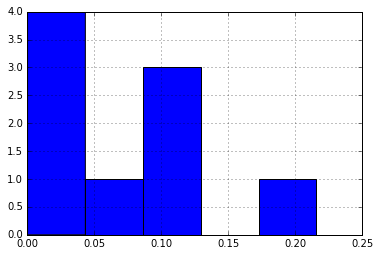

In [26]:
featureDF_withAnnots['frequencyCount (%)_mean_T'].hist(bins=5)
plt.show()

## generate TCRdf for productive sequences and plot sample clustering by sequence matrix:

In [27]:
AllUniqueWithCounts=pd.read_pickle('%s/TCR_real_data/RavidSamples2/sharingAnalysis/AllUniqueWithCounts' %MyPath)
AllUniqueWithCounts.head()

,frequencyCount (%),prod_stat,Sample,nShared,isPublic
*ASGSQSRANVLTF,0.156250,0,MB38334,1,0
*ASSSLAPIRKP*GDTI,0.000192,0,MB38011ravid2,1,0
*G*KTYGYTF,0.025088,0,MB38321,1,0
APAQVGQPDEKLFF,0.090580,1,MB38316,1,0
CA*AA**GTGSYEQYF,0.000192,0,MB38011ravid2,1,0


(15525, 5)
(151, 5)
(9, 71)
index          CASRLSGAYNEQFF  CASSAGLAGYNEQFF  CASSEAGANTEAFF  CASSESYEQYF  CASSFGMNTEAFF  CASSFLETQYF  CASSFQGNTEAFF  CASSFSYEQYF  CASSFTLNTEAFF  CASSHSYEQYF     ...      CASSSSGGAYNEQFF  CASSTGTGYEQYF  CASSVDSYNEQFF  CASSVGNTGELFF  CASSVTGGSYNEQFF  CASSVVVTGELFF  CASSYRSSYEQYF  CASSYSGGSYNEQFF  CASSYSSGSDTQYF  CSALQETQYF
Sample                                                                                                                                                              ...                                                                                                                                                              
MB38005              0.014041         0.014041        0.000000     0.000000       0.000000     0.028082       0.014041     0.014041       0.000000     0.000000     ...             0.000000       0.000000       0.000000       0.014041         0.014041            0.0       0.000000         0.014041        0.014041       

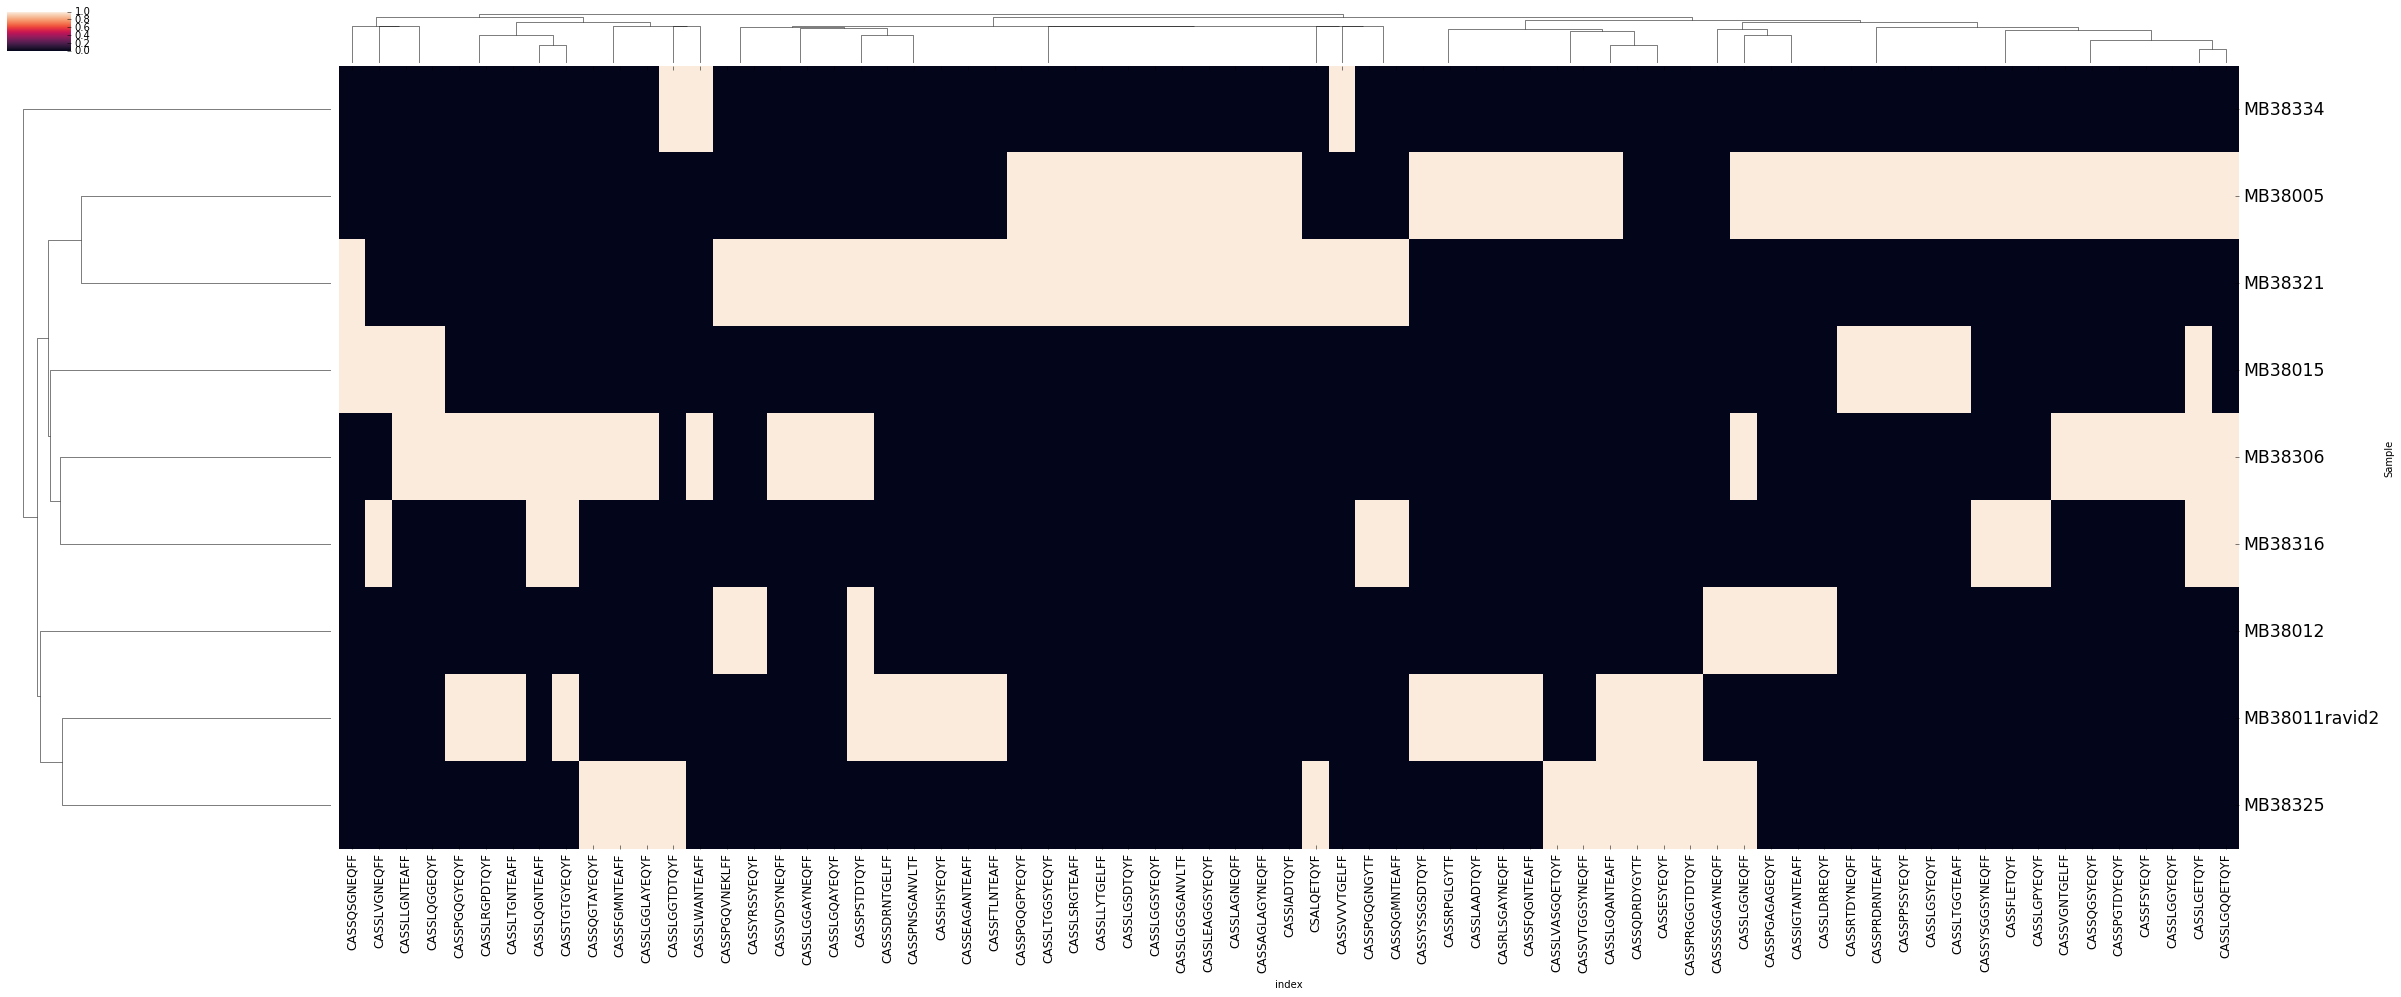

Sample
MB38005          38
MB38011ravid2    19
MB38012           8
MB38015          10
MB38306          23
MB38316          10
MB38321          27
MB38325          13
MB38334           3
dtype: int64


In [28]:
metric='jaccard'
nShared=2
seqFontSize='large'
figsize=(40,15)

print AllUniqueWithCounts.shape
prod=AllUniqueWithCounts[(AllUniqueWithCounts['nShared']>=nShared) & (AllUniqueWithCounts['prod_stat']==1)]
print prod.shape
TCRdf=prod.reset_index().pivot(index='Sample',columns='index', values='frequencyCount (%)').fillna(0)
print TCRdf.shape
print TCRdf.head()

TCRdf_binary=(TCRdf>0).astype(int)
print TCRdf_binary.iloc[:4,:4]

TCRdf_binary.to_excel('%s/TCR_real_data/RavidSamples2/sharingAnalysis/TCRdf_prod_minShared%s_binary.xlsx' %(MyPath,nShared))
TCRdf_binary.to_pickle('%s/TCR_real_data/RavidSamples2/sharingAnalysis/TCRdf_prod_minShared%s_binary.dat' %(MyPath,nShared))

## calculate sample clustering by TCRdf load:
g=sns.clustermap(data=TCRdf_binary, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples2/Analysis/sampleClusteringBySharedProdSeqs_nShared%s_metric%s.png' %(MyPath,nShared,metric))
print TCRdf_binary.sum(axis=1)



(15525, 5)
(21, 5)
(8, 6)
index          CASSLGETQYF  CASSLGGNEQFF  CASSLGQANTEAFF  CASSLGQQETQYF  CASSPSTDTQYF  CASSTGTGYEQYF
Sample                                                                                              
MB38005           0.014041      0.154451        0.014041       0.014041      0.000000       0.000000
MB38011ravid2     0.000000      0.000000        0.000192       0.000000      0.000192       0.000192
MB38012           0.000000      0.117786        0.000000       0.000000      0.117786       0.000000
MB38015           0.086133      0.000000        0.000000       0.000000      0.000000       0.000000
MB38306           0.023191      0.162338        0.000000       0.023191      0.023191       0.023191
index          CASSLGETQYF  CASSLGGNEQFF  CASSLGQANTEAFF  CASSLGQQETQYF
Sample                                                                 
MB38005                  1             1               1              1
MB38011ravid2            0             0           

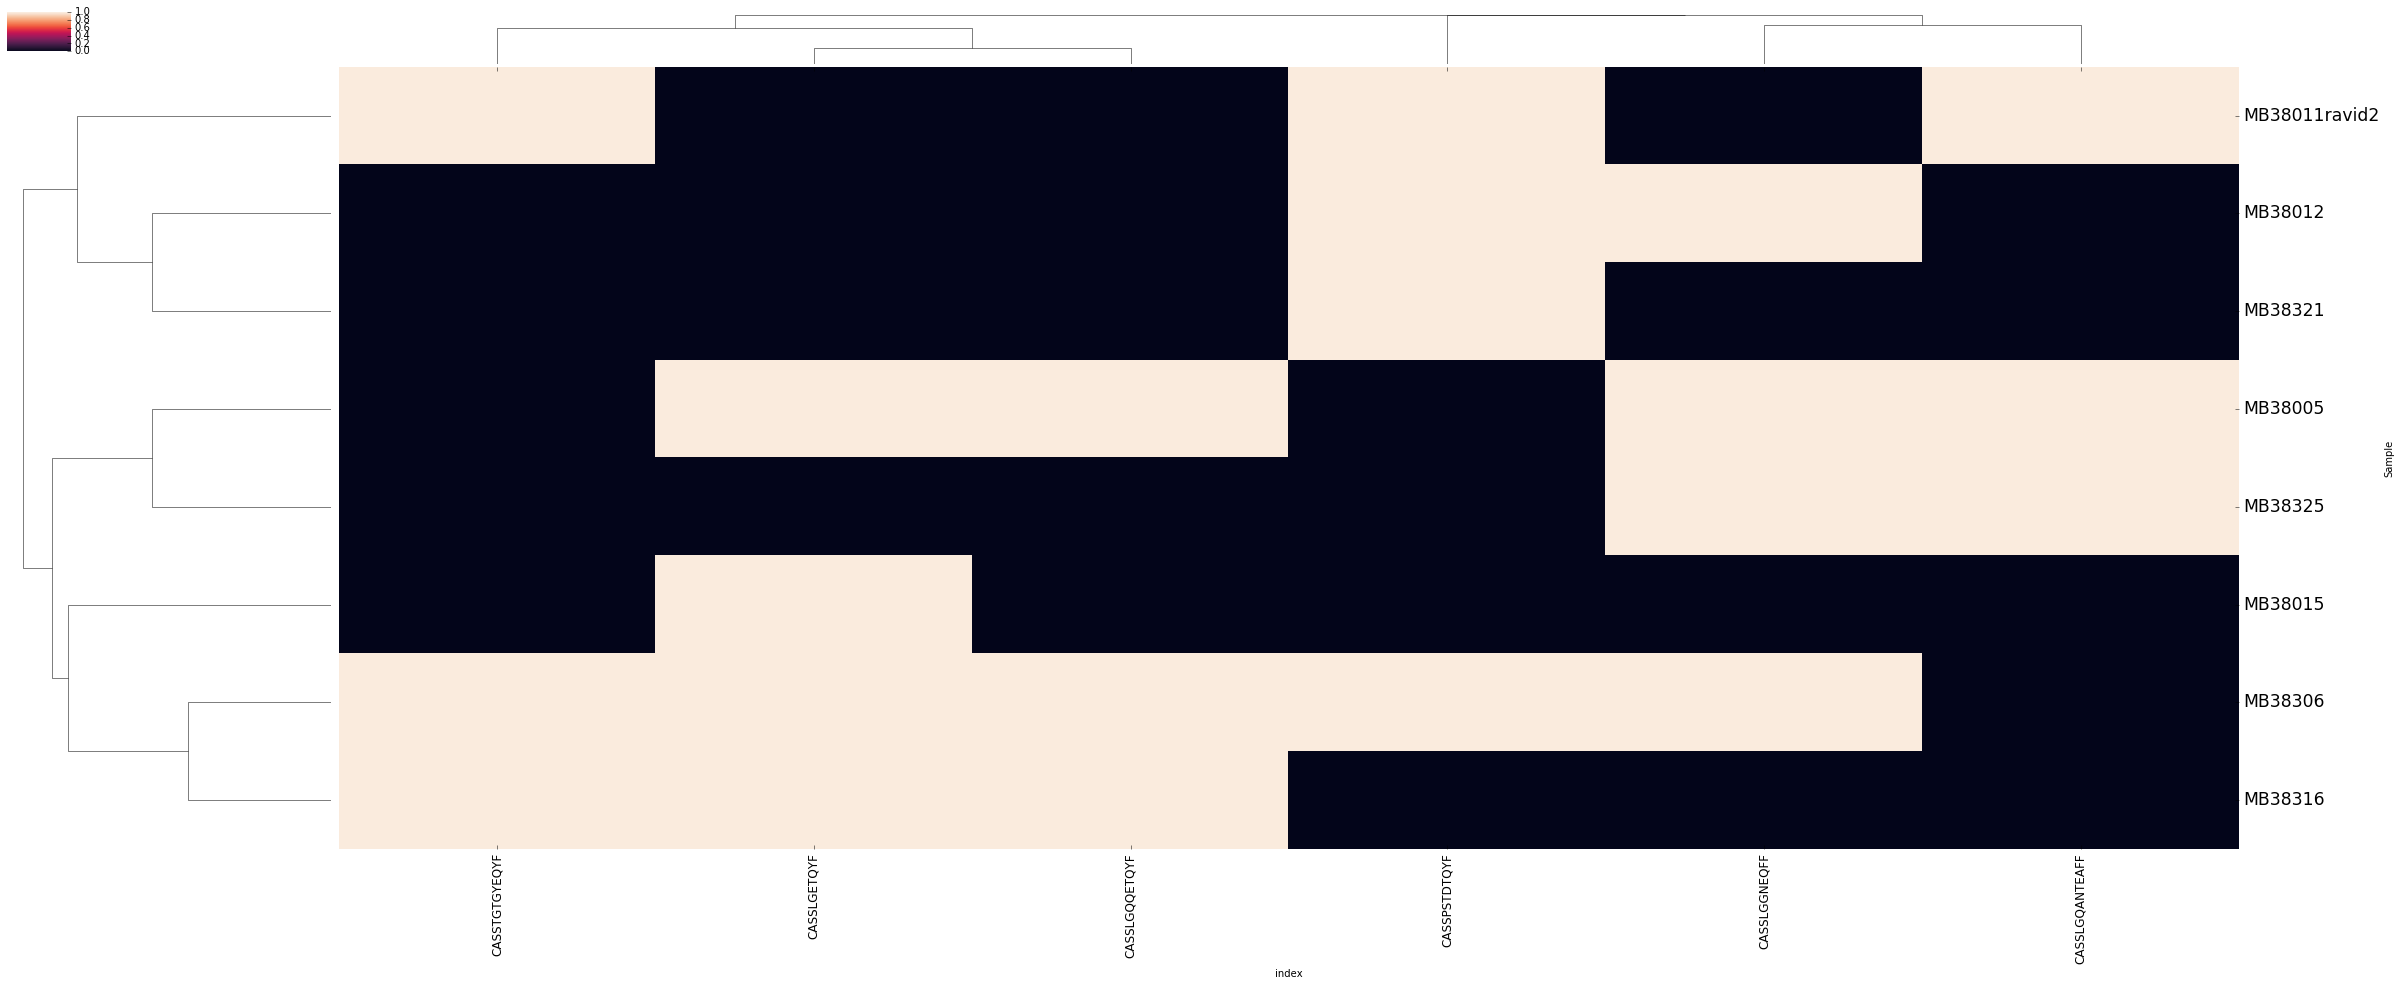

Sample
MB38005          4
MB38011ravid2    3
MB38012          2
MB38015          1
MB38306          5
MB38316          3
MB38321          1
MB38325          2
dtype: int64


In [29]:
metric='jaccard'
nShared=3
seqFontSize='large'
figsize=(40,15)

print AllUniqueWithCounts.shape
prod=AllUniqueWithCounts[(AllUniqueWithCounts['nShared']>=nShared) & (AllUniqueWithCounts['prod_stat']==1)]
print prod.shape
TCRdf=prod.reset_index().pivot(index='Sample',columns='index', values='frequencyCount (%)').fillna(0)
print TCRdf.shape
print TCRdf.head()

TCRdf_binary=(TCRdf>0).astype(int)
print TCRdf_binary.iloc[:4,:4]

TCRdf_binary.to_excel('%s/TCR_real_data/RavidSamples2/sharingAnalysis/TCRdf_prod_minShared%s_binary.xlsx' %(MyPath,nShared))
TCRdf_binary.to_pickle('%s/TCR_real_data/RavidSamples2/sharingAnalysis/TCRdf_prod_minShared%s_binary.dat' %(MyPath,nShared))

## calculate sample clustering by TCRdf load:
g=sns.clustermap(data=TCRdf_binary, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples2/Analysis/sampleClusteringBySharedProdSeqs_nShared%s_metric%s.png' %(MyPath,nShared,metric))
print TCRdf_binary.sum(axis=1)



(15525, 5)
(12, 5)
(8, 3)
index          CASSLGETQYF  CASSLGGNEQFF  CASSPSTDTQYF
Sample                                                
MB38005           0.014041      0.154451      0.000000
MB38011ravid2     0.000000      0.000000      0.000192
MB38012           0.000000      0.117786      0.117786
MB38015           0.086133      0.000000      0.000000
MB38306           0.023191      0.162338      0.023191
index          CASSLGETQYF  CASSLGGNEQFF  CASSPSTDTQYF
Sample                                                
MB38005                  1             1             0
MB38011ravid2            0             0             1
MB38012                  0             1             1
MB38015                  1             0             0


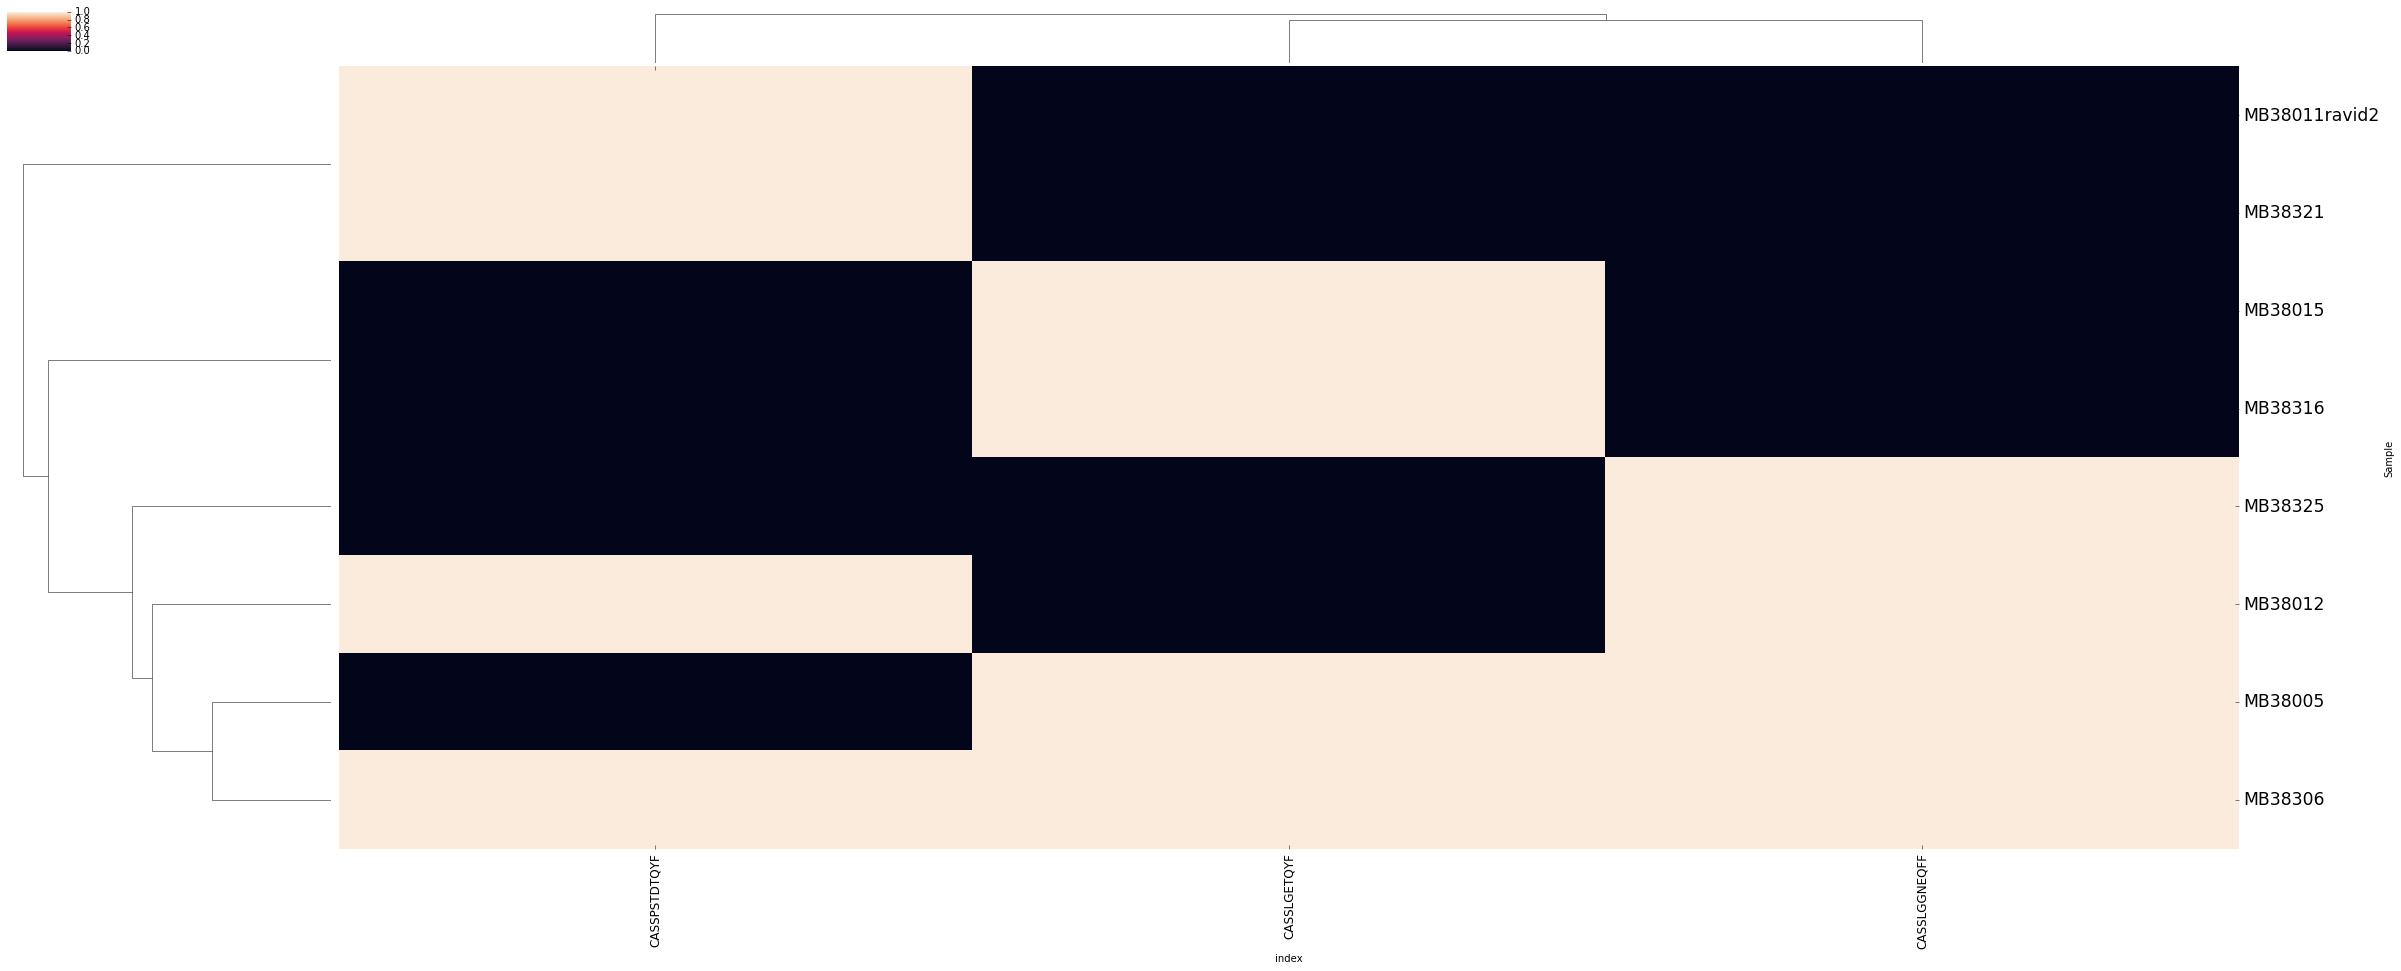

Sample
MB38005          2
MB38011ravid2    1
MB38012          2
MB38015          1
MB38306          3
MB38316          1
MB38321          1
MB38325          1
dtype: int64


In [30]:
metric='jaccard'
nShared=4
seqFontSize='large'
figsize=(40,15)

print AllUniqueWithCounts.shape
prod=AllUniqueWithCounts[(AllUniqueWithCounts['nShared']>=nShared) & (AllUniqueWithCounts['prod_stat']==1)]
print prod.shape
TCRdf=prod.reset_index().pivot(index='Sample',columns='index', values='frequencyCount (%)').fillna(0)
print TCRdf.shape
print TCRdf.head()

TCRdf_binary=(TCRdf>0).astype(int)
print TCRdf_binary.iloc[:4,:4]

TCRdf_binary.to_excel('%s/TCR_real_data/RavidSamples2/sharingAnalysis/TCRdf_prod_minShared%s_binary.xlsx' %(MyPath,nShared))
TCRdf_binary.to_pickle('%s/TCR_real_data/RavidSamples2/sharingAnalysis/TCRdf_prod_minShared%s_binary.dat' %(MyPath,nShared))

## calculate sample clustering by TCRdf load:
g=sns.clustermap(data=TCRdf_binary, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples2/Analysis/sampleClusteringBySharedProdSeqs_nShared%s_metric%s.png' %(MyPath,nShared,metric))
print TCRdf_binary.sum(axis=1)



Empty DataFrame
Columns: []
Index: [MB38321, MB38325, MB38005, MB38306, MB38334, MB38316, MB38015, MB38011ravid2, MB38012]


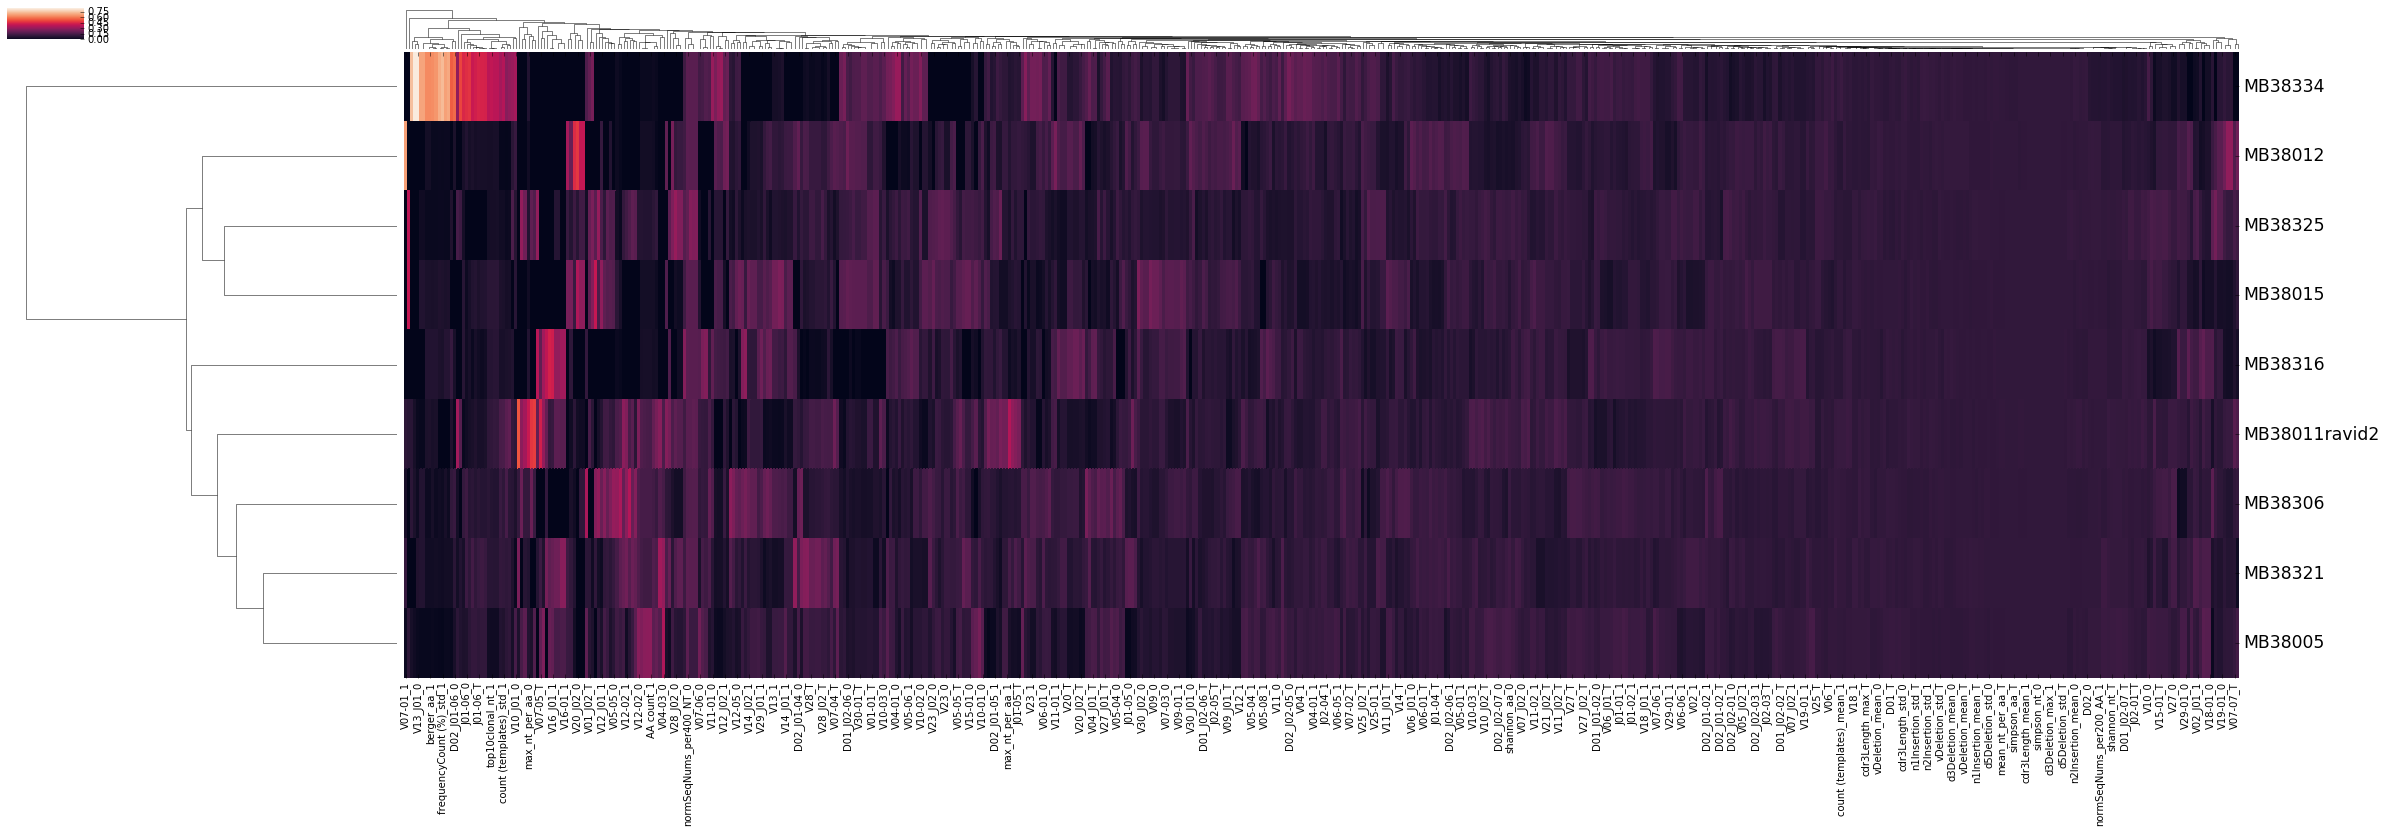

In [31]:
## calculate sample clustering by TCR features
metric='euclidean'
seqFontSize='medium'
figsize=(40,12)

## normalize matrix:
featureDF_scaled = featureDF / featureDF.sum()
featureDF_scaled = featureDF_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_scaled:
    featureDF_scaled[col]=featureDF_scaled[col].fillna(featureDF_scaled[col].median())
    if featureDF_scaled[col].dtype != 'float64':
        print col,featureDF_scaled[col].dtype

# print featureDF_scaled[featureDF_scaled.isnull().any(axis=1)]
print featureDF_scaled.loc[:, featureDF_scaled.isna().any()]



g2=sns.clustermap(data=featureDF_scaled, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g2.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g2.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g2.savefig('%s/TCR_real_data/RavidSamples2/Analysis/sampleClusteringByTCRfeatures_%s.png' %(MyPath,metric))


599
205
Empty DataFrame
Columns: []
Index: [MB38321, MB38325, MB38005, MB38306, MB38334, MB38316, MB38015, MB38011ravid2, MB38012]


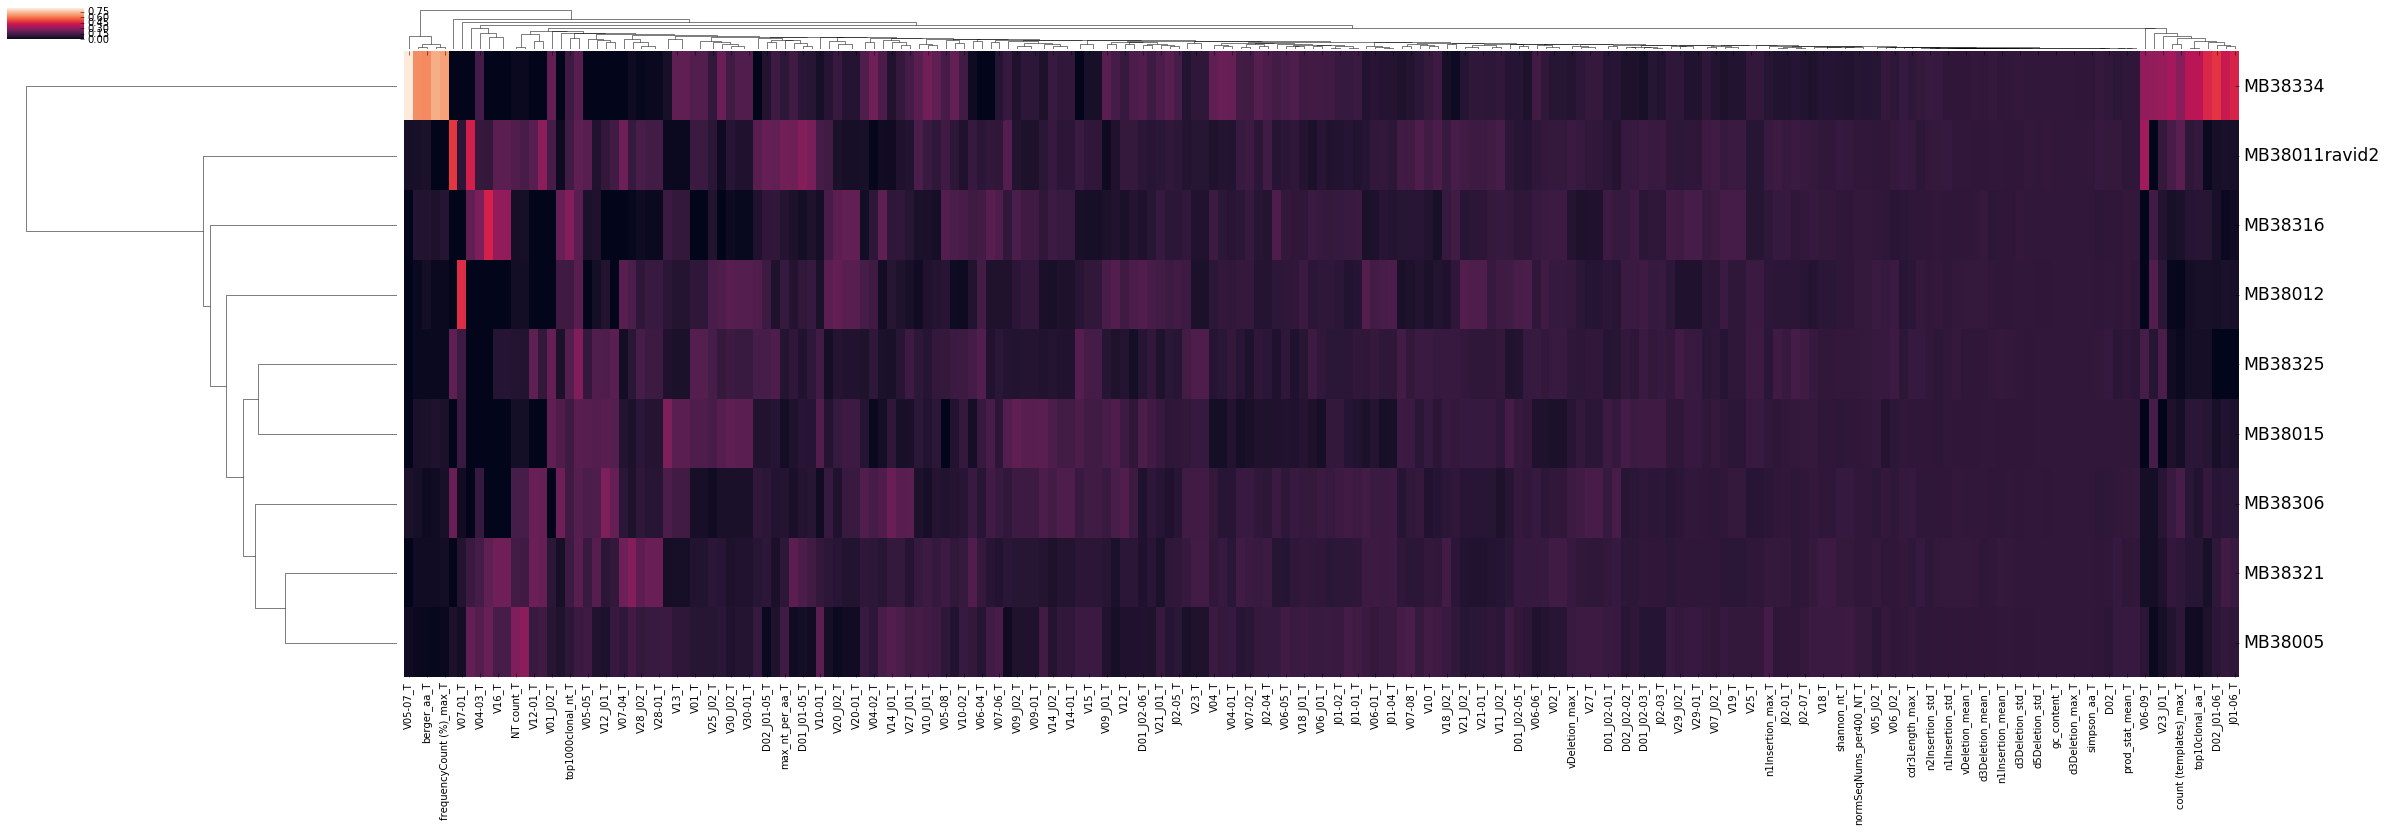

In [32]:
## calculate sample clustering by TCR features - only T 
metric='euclidean'
seqFontSize='medium'
figsize=(40,12)

## normalize matrix:
Tcols=[col for col in featureDF.columns if '_T' in col]
print len(featureDF.columns)
print len(Tcols)

featureDF_Tonly=featureDF[Tcols]

featureDF_Tonly_scaled = featureDF_Tonly / featureDF_Tonly.sum()
# featureDF_Tonly_scaled = featureDF_Tonly_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_Tonly_scaled:
    featureDF_Tonly_scaled[col]=featureDF_Tonly_scaled[col].fillna(featureDF_Tonly_scaled[col].median())
    if featureDF_Tonly_scaled[col].dtype != 'float64':
        print col,featureDF_Tonly_scaled[col].dtype

# print featureDF_Tonly_scaled[featureDF_Tonly_scaled.isnull().any(axis=1)]
print featureDF_Tonly_scaled.loc[:, featureDF_Tonly_scaled.isna().any()]



g3=sns.clustermap(data=featureDF_Tonly_scaled, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g3.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g3.savefig('%s/TCR_real_data/RavidSamples2/Analysis/sampleClusteringByTCRfeatures_onlyT_%s.png' %(MyPath,metric))


599
205
featureDF_Tonly_withRels
(9, 241)
                  V01_T     V02_T     V04_T     V05_T     V06_T     V07_T     V09_T     V10_T     V11_T     V12_T                ...                 Colorectalcancer_rel_seq_count  Colorectalcancer_rel_cum_freq(perc)  RSV_rel_seq_count  RSV_rel_cum_freq(perc)  RheumatoidArthritis_rel_seq_count  RheumatoidArthritis_rel_cum_freq(perc)  SIV_rel_seq_count  SIV_rel_cum_freq(perc)  WestNilevirus_rel_seq_count  WestNilevirus_rel_cum_freq(perc)
MB38005        0.001779  0.034391  0.066410  0.143789  0.095464  0.166617  0.035280  0.047139  0.058405  0.006522                ...                                       0.000000                             0.000000           0.000000                0.000000                           0.000000                                0.000000           0.000000                0.000000                     0.000000                          0.000000
MB38011ravid2  0.002716  0.043911  0.035310  0.142146  0.090086  0.196922  0

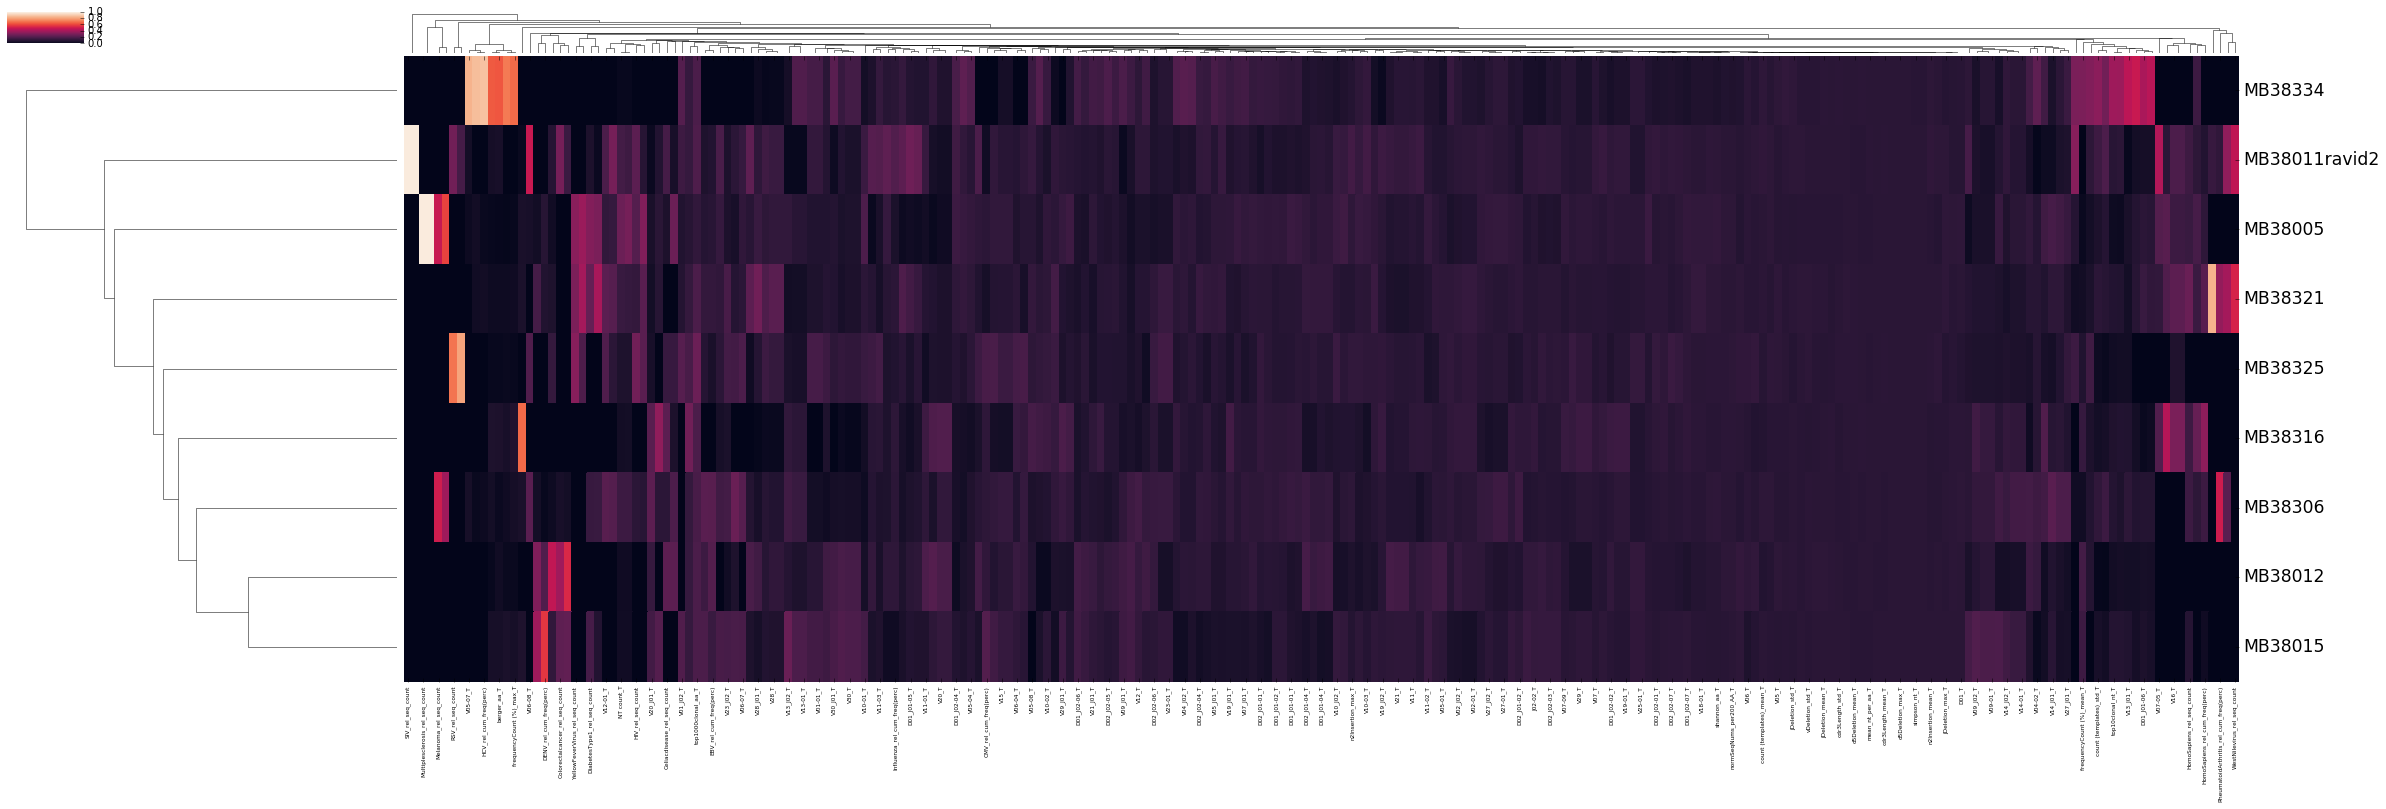

In [33]:
## calculate sample clustering by TCR features - only T + annot features
metric='euclidean'
seqFontSize='xx-small'
figsize=(40,12)

## normalize matrix:
Tcols=[col for col in featureDF.columns if '_T' in col]
print len(featureDF.columns)
print len(Tcols)

featureDF_Tonly=featureDF[Tcols]

featureDF_Tonly_withRels=pd.merge(featureDF_Tonly,annotDF_rels.fillna(0),how='outer',left_index=True,right_index=True)
print ('featureDF_Tonly_withRels')
print featureDF_Tonly_withRels.shape
print featureDF_Tonly_withRels.head()

featureDF_Tonly_withRels_scaled = featureDF_Tonly_withRels / featureDF_Tonly_withRels.sum()
# featureDF_Tonly_withRels_scaled = featureDF_Tonly_withRels_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_Tonly_withRels_scaled:
    featureDF_Tonly_withRels_scaled[col]=featureDF_Tonly_withRels_scaled[col].fillna(featureDF_Tonly_withRels_scaled[col].median())
    if featureDF_Tonly_withRels_scaled[col].dtype != 'float64':
        print col,featureDF_Tonly_withRels_scaled[col].dtype

# print featureDF_Tonly_withRels_scaled[featureDF_Tonly_withRels_scaled.isnull().any(axis=1)]
print featureDF_Tonly_withRels_scaled.loc[:, featureDF_Tonly_withRels_scaled.isna().any()]



g4=sns.clustermap(data=featureDF_Tonly_withRels_scaled, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g4.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g4.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g4.savefig('%s/TCR_real_data/RavidSamples2/Analysis/sampleClusteringByTCRfeatures_onlyT_withRels_%s.png' %(MyPath,metric))


## get top n seqs, their freqs and their identity - preliminary

(900, 6)
                 frequencyCount (%)  prod_stat   Sample  nShared  isPublic combined annotation_list_clean
CASSTRLANQETQYF            17.34375          1  MB38334        1         0                            NaN
CASSLIQGGLLPLHF             6.56250          1  MB38334        1         0                            NaN
CASSPGGERSPLHF              0.62500          1  MB38334        1         0                            NaN
CASSPGRGYTDTQYF             0.62500          1  MB38334        1         0                            NaN
CASSPAGASYEQYF              0.46875          1  MB38334        1         0                            NaN
combined annotation_list_clean  Allergy  CMV  Celiacdisease  Colorectalcancer  DENV  EBV  HCV  HomoSapiens  Influenza  RSV
Sample                                                                                                                    
MB38005                               0    1              1                 0     1    0    0            0   

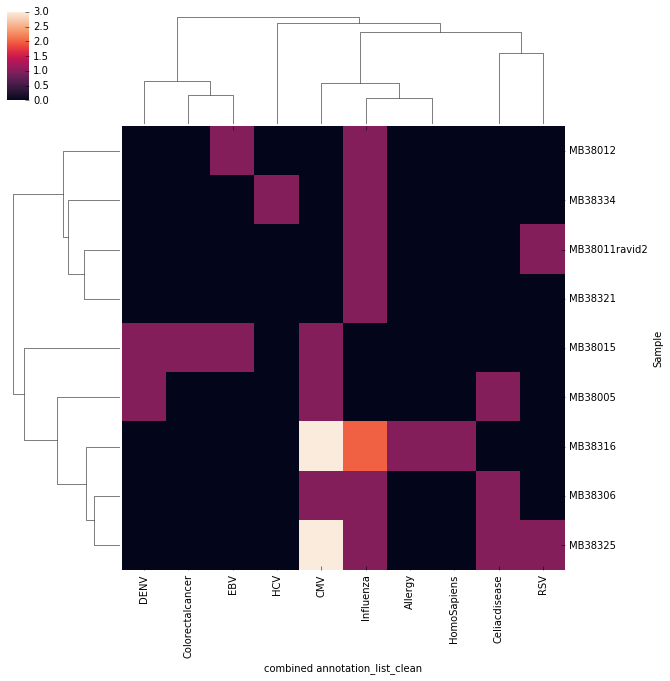

In [34]:
nTop=100
metric='correlation'

## calculate annotation load per sample
df_list=[]
for sample in annot.Sample.unique():
    df=annot[(annot.Sample==sample)& (annot.prod_stat==1)]
    df=df.sort_values(by='frequencyCount (%)',ascending=False)
    df=df.iloc[:nTop,:]
#     print df.head()
    df_list.append(df)
    
top=pd.concat(df_list)

top.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/top%s_perSample_withannot.xlsx' %(MyPath,nTop))

print top.shape
print top.head()

pivot=top.pivot_table(values='nShared',index='Sample', columns='combined annotation_list_clean', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print pivot


## calculate sample clustering by annotation load:
g=sns.clustermap(data=pivot, method='average', metric=metric, z_score=None, standard_scale=None, figsize=None,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples2/Analysis/top%s_perSample_withannot_clusteringby%s.png' %(MyPath,nTop,metric))

(2700, 6)
                 frequencyCount (%)  prod_stat   Sample  nShared  isPublic combined annotation_list_clean
CASSTRLANQETQYF            17.34375          1  MB38334        1         0                            NaN
CASSLIQGGLLPLHF             6.56250          1  MB38334        1         0                            NaN
CASSPGGERSPLHF              0.62500          1  MB38334        1         0                            NaN
CASSPGRGYTDTQYF             0.62500          1  MB38334        1         0                            NaN
CASSPAGASYEQYF              0.46875          1  MB38334        1         0                            NaN
combined annotation_list_clean  Allergy  CMV  Celiacdisease  Colorectalcancer  DENV  DiabetesType1  EBV  HCV  HIV  HomoSapiens  Influenza  Melanoma  RSV  RheumatoidArthritis  WestNilevirus  YellowFeverVirus
Sample                                                                                                                                             

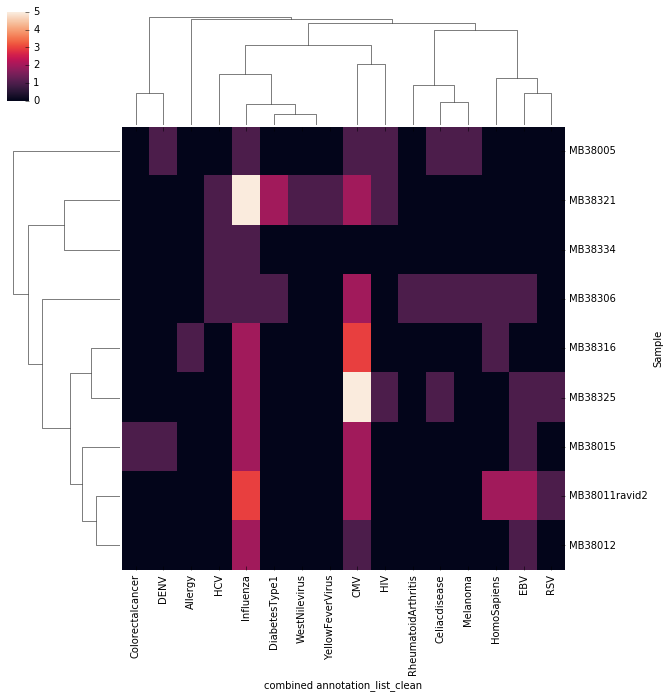

In [35]:
nTop=300
metric='correlation'

## calculate annotation load per sample
df_list=[]
for sample in annot.Sample.unique():
    df=annot[(annot.Sample==sample)& (annot.prod_stat==1)]
    df=df.sort_values(by='frequencyCount (%)',ascending=False)
    df=df.iloc[:nTop,:]
#     print df.head()
    df_list.append(df)
    
top=pd.concat(df_list)

top.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/top%s_perSample_withannot.xlsx' %(MyPath,nTop))

print top.shape
print top.head()

pivot=top.pivot_table(values='nShared',index='Sample', columns='combined annotation_list_clean', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print pivot


## calculate sample clustering by annotation load:
g=sns.clustermap(data=pivot, method='average', metric=metric, z_score=None, standard_scale=None, figsize=None,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples2/Analysis/top%s_perSample_withannot_clusteringby%s.png' %(MyPath,nTop,metric))

(1800, 6)
                 frequencyCount (%)  prod_stat   Sample  nShared  isPublic combined annotation_list_clean
CASSTRLANQETQYF            17.34375          1  MB38334        1         0                            NaN
CASSLIQGGLLPLHF             6.56250          1  MB38334        1         0                            NaN
CASSPGGERSPLHF              0.62500          1  MB38334        1         0                            NaN
CASSPGRGYTDTQYF             0.62500          1  MB38334        1         0                            NaN
CASSPAGASYEQYF              0.46875          1  MB38334        1         0                            NaN
combined annotation_list_clean  Allergy  CMV  Celiacdisease  Colorectalcancer  DENV  DiabetesType1  EBV  HCV  HIV  HomoSapiens  Influenza  Melanoma  RSV  RheumatoidArthritis  WestNilevirus
Sample                                                                                                                                                               

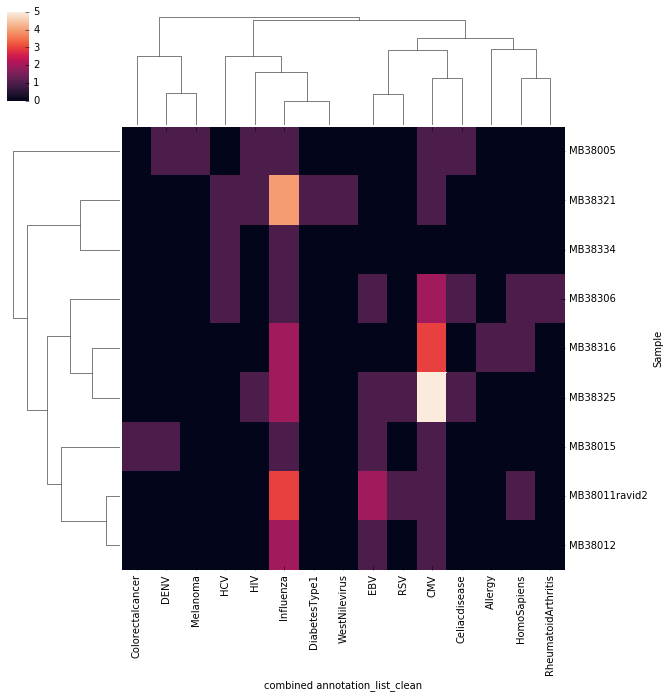

In [36]:
nTop=200
metric='correlation'

## calculate annotation load per sample
df_list=[]
for sample in annot.Sample.unique():
    df=annot[(annot.Sample==sample)& (annot.prod_stat==1)]
    df=df.sort_values(by='frequencyCount (%)',ascending=False)
    df=df.iloc[:nTop,:]
#     print df.head()
    df_list.append(df)
    
top=pd.concat(df_list)

top.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/top%s_perSample_withannot.xlsx' %(MyPath,nTop))

print top.shape
print top.head()

pivot=top.pivot_table(values='nShared',index='Sample', columns='combined annotation_list_clean', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print pivot


## calculate sample clustering by annotation load:
g=sns.clustermap(data=pivot, method='average', metric=metric, z_score=None, standard_scale=None, figsize=None,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples2/Analysis/top%s_perSample_withannot_clusteringby%s.png' %(MyPath,nTop,metric))

## PCoA analysis

In [ ]:
the function calc_PCoA was copied to Feature_Phenotype_Functions.py

### TCRdf:

#### by responders:

In [38]:
# generate again TCRdf:

nShared = 2
print AllUniqueWithCounts.shape
prod=AllUniqueWithCounts[(AllUniqueWithCounts['nShared']>=nShared) & (AllUniqueWithCounts['prod_stat']==1)]
print prod.shape
TCRdf=prod.reset_index().pivot(index='Sample',columns='index', values='frequencyCount (%)').fillna(0)
print TCRdf.shape
# print TCRdf.head()

TCRdf_binary=(TCRdf>0).astype(int)
print TCRdf_binary.shape
print TCRdf_binary

(15525, 5)
(151, 5)
(9, 71)
(9, 71)
index          CASRLSGAYNEQFF  CASSAGLAGYNEQFF  CASSEAGANTEAFF  CASSESYEQYF  CASSFGMNTEAFF  CASSFLETQYF  CASSFQGNTEAFF  CASSFSYEQYF  CASSFTLNTEAFF  CASSHSYEQYF     ...      CASSSSGGAYNEQFF  CASSTGTGYEQYF  CASSVDSYNEQFF  CASSVGNTGELFF  CASSVTGGSYNEQFF  CASSVVVTGELFF  CASSYRSSYEQYF  CASSYSGGSYNEQFF  CASSYSSGSDTQYF  CSALQETQYF
Sample                                                                                                                                                              ...                                                                                                                                                              
MB38005                     1                1               0            0              0            1              1            1              0            0     ...                    0              0              0              1                1              0              0                1               

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

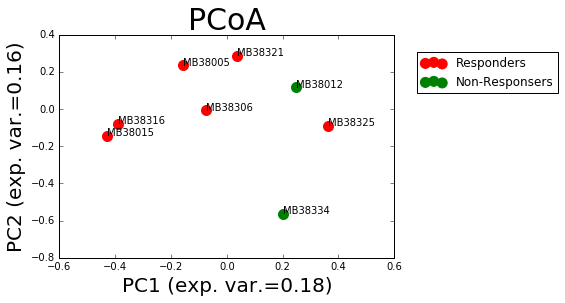

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

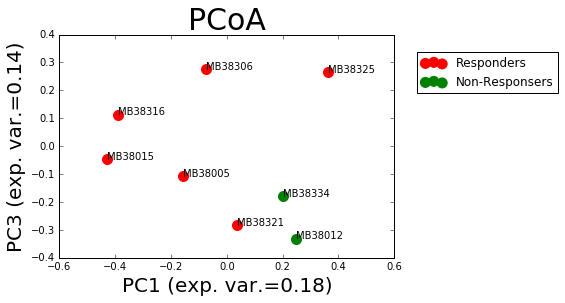

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

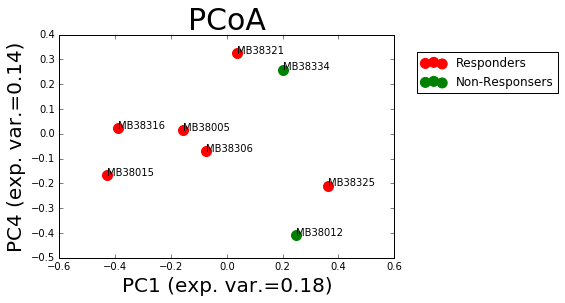

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

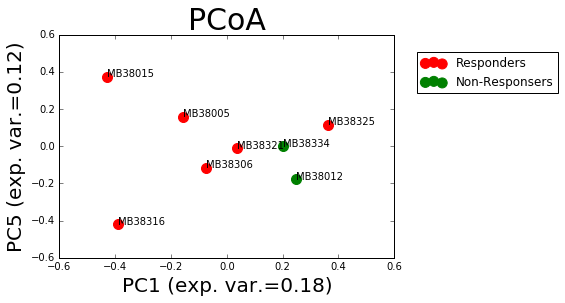

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

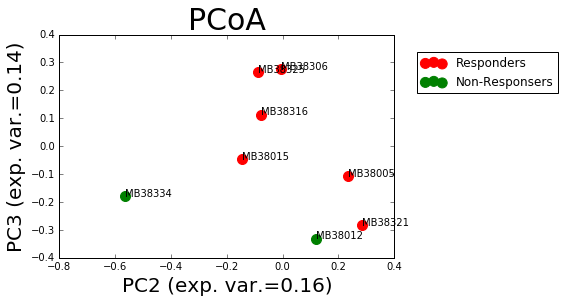

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

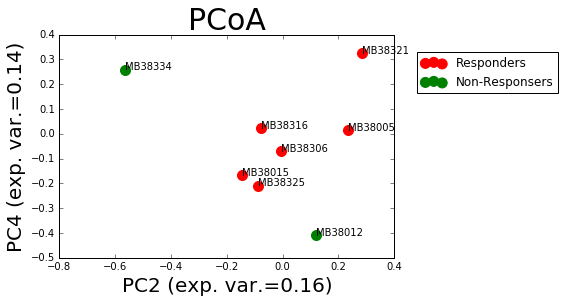

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

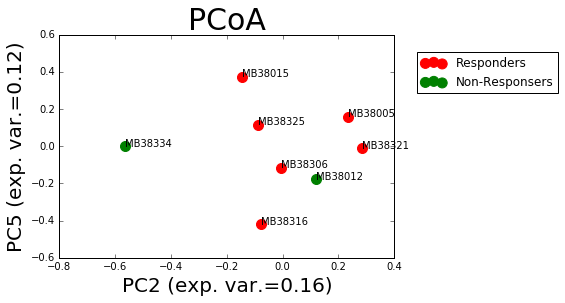

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

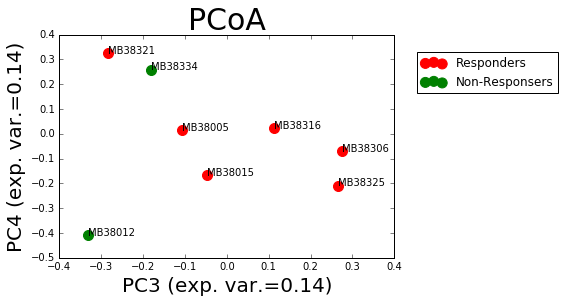

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

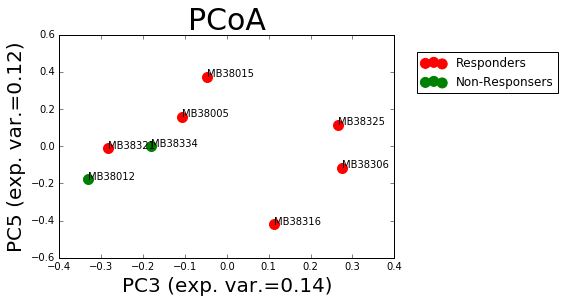

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

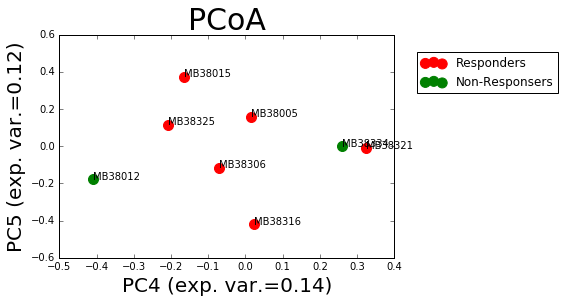

In [39]:
df=TCRdf_binary
metric='jaccard'

sample_list_list=[('Responders',['MB38015','MB38005','MB38316','MB38306','MB38325','MB38321']),
                 ('Non-Responsers',['MB38012','MB38334'])]
# no treatment: 'MB38011ravid2'


color_list=['red','green']
for i in range(5):
    for j in range(i+1,5):

        pcoa_n1_toplot=i
        pcoa_n2_toplot=j
        
        pcoa_df,fig,ax= calc_PCoA(df,metric,sample_list_list,color_list,pcoa_n1_toplot=pcoa_n1_toplot,
                          pcoa_n2_toplot=pcoa_n2_toplot,toScale=False,toAnnotate=True)

        
        plt.show()

#### by cancer type:

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

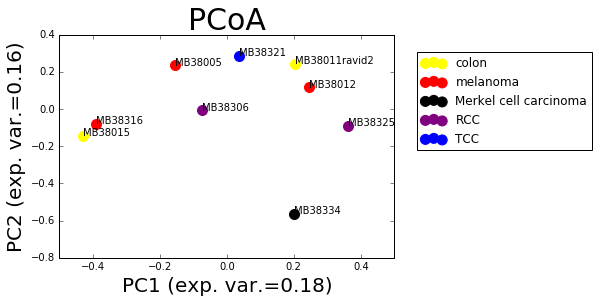

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

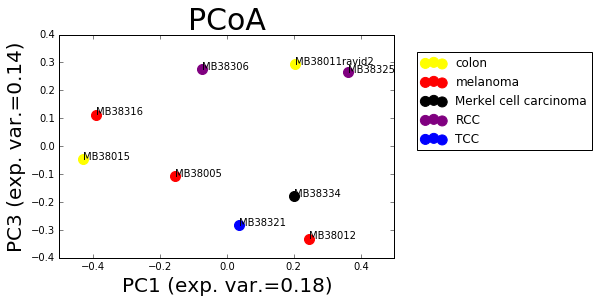

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

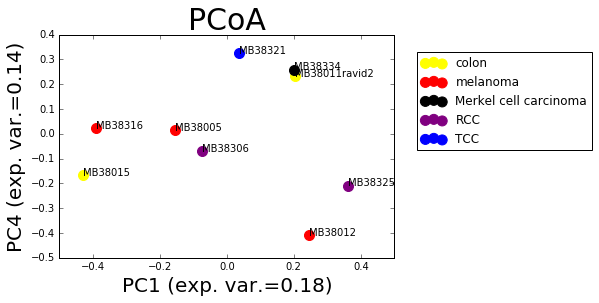

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

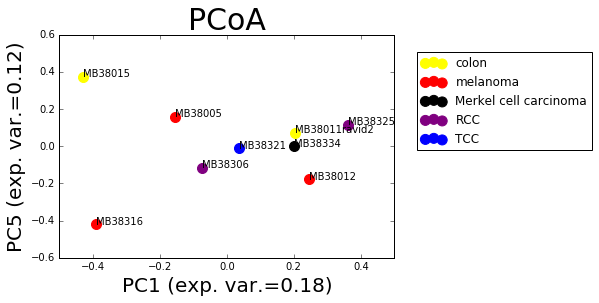

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

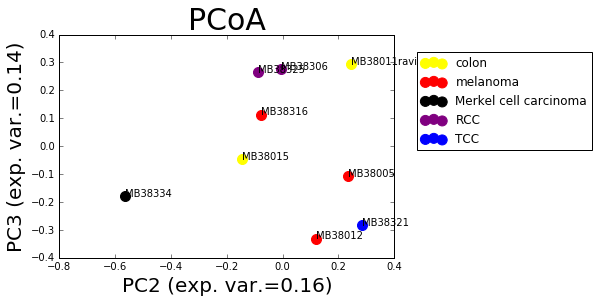

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

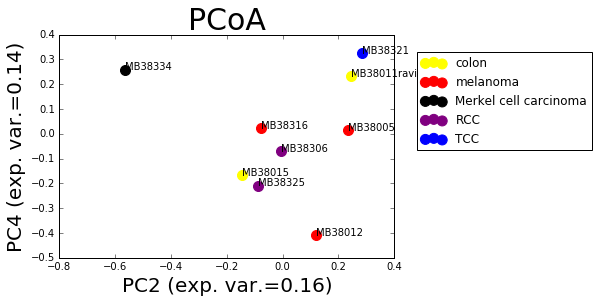

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

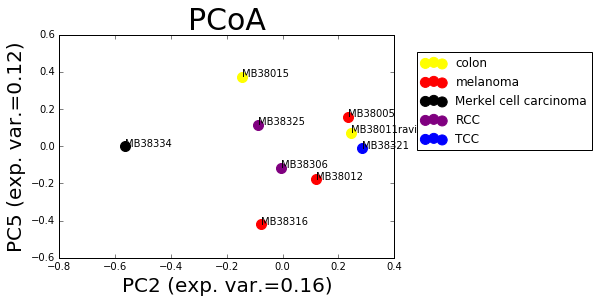

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

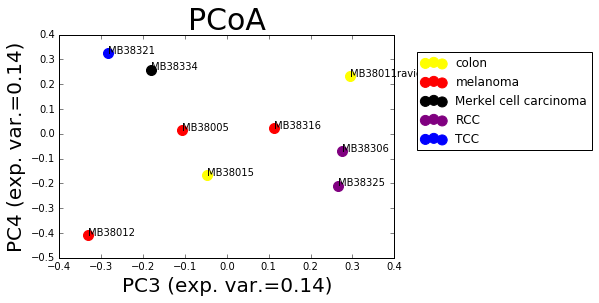

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

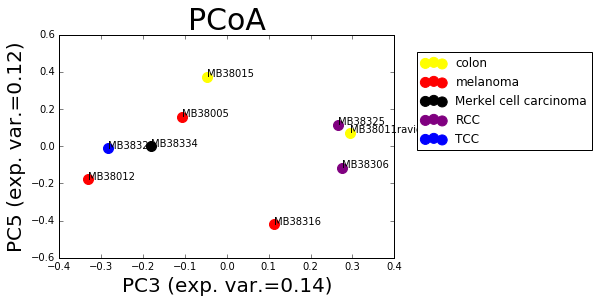

generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
        dist        sample1        sample2
5   0.796296        MB38005        MB38321
3   0.849057        MB38005        MB38306
12  0.850000  MB38011ravid2        MB38321
2   0.857143        MB38005        MB38015
13  0.857143  MB38011ravid2        MB38325
26  0.862069        MB38306        MB38316
10  0.864865  MB38011ravid2        MB38306
28  0.875000        MB38306        MB38325
0   0.882353        MB38005  MB38011ravid2
4   0.883721        MB38005        MB38316
generating squareform distance matrix using jaccard
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38005       -0.155768  0.235051 -0.107774  0.015457  0.158551  0.074724  0.344612  0.270588 -0.0
MB38011ravid2  0.204281  0.244172  0.294568  0.232806  0.072587 -0.160195 -0.262300  0.176833 -0.0
MB38012        0.246211  0.118388 -0.331875 -0.409892 -0.176264

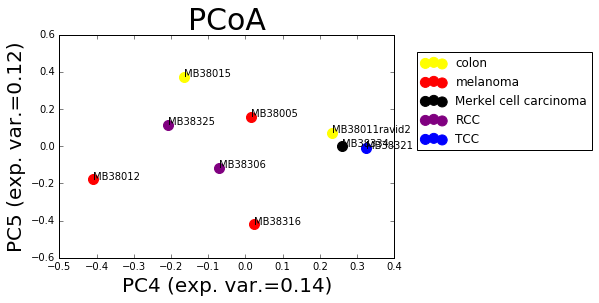

In [40]:
df=TCRdf_binary
metric='jaccard'

sample_list_list=[('colon',['MB38015','MB38011ravid2']),('melanoma',['MB38005','MB38316','MB38012']),
                  ('Merkel cell carcinoma',['MB38334']),
                  ('RCC',['MB38306','MB38325']),('TCC',['MB38321'])]
             
color_list=['yellow','red','black','purple','blue','green']

for i in range(5):
    for j in range(i+1,5):

        pcoa_n1_toplot=i
        pcoa_n2_toplot=j

        pcoa_df,fig,ax= calc_PCoA(df,metric,sample_list_list,color_list,pcoa_n1_toplot=pcoa_n1_toplot,
                                  pcoa_n2_toplot=pcoa_n2_toplot,toScale=False,toAnnotate=True)

        plt.show()


### features:

#### by responders:

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

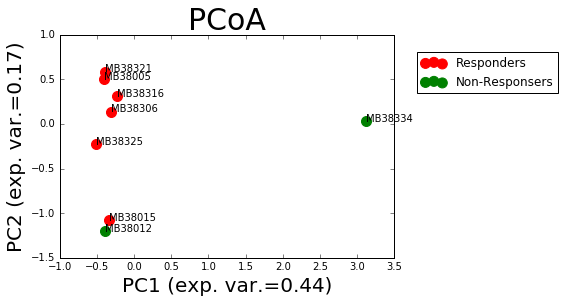

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

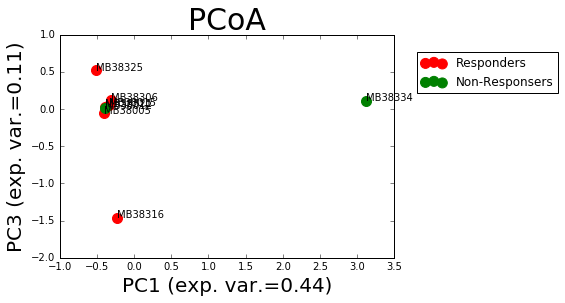

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

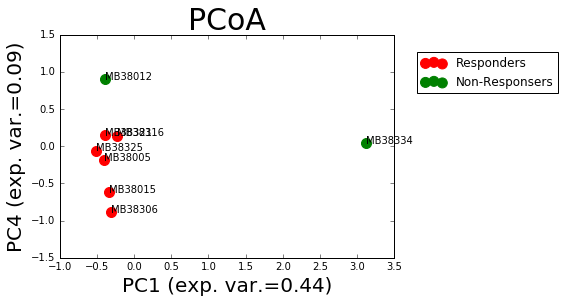

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

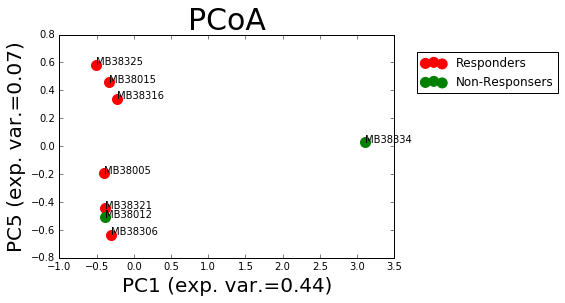

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

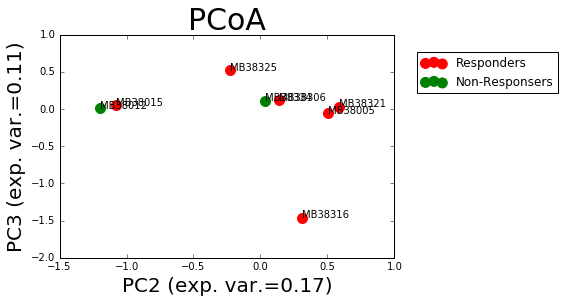

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

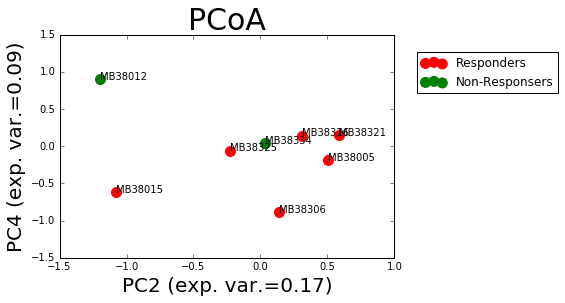

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

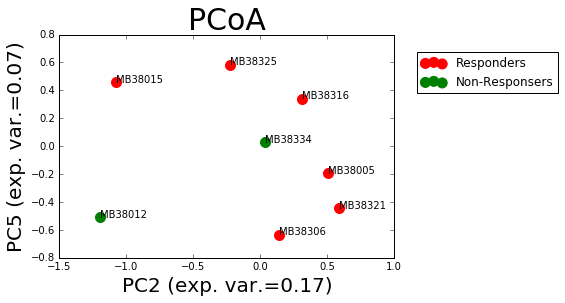

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

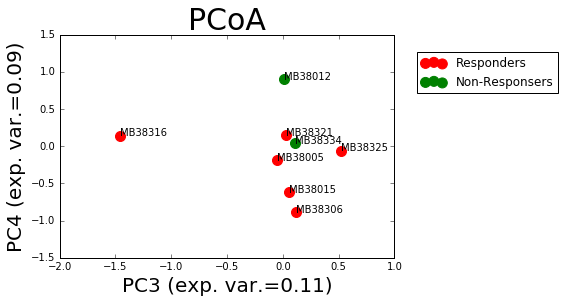

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

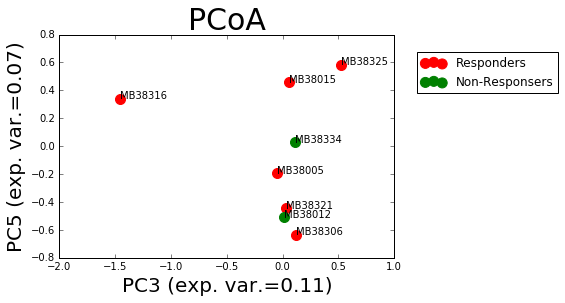

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

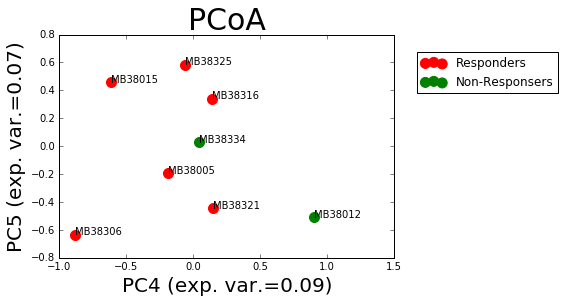

In [41]:
featureDF_scaled = featureDF / featureDF.sum()
featureDF_scaled = featureDF_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_scaled:
    featureDF_scaled[col]=featureDF_scaled[col].fillna(featureDF_scaled[col].median())
    if featureDF_scaled[col].dtype != 'float64':
        print col,featureDF_scaled[col].dtype

df=featureDF_scaled
metric='euclidean'

sample_list_list=[('Responders',['MB38015','MB38005','MB38316','MB38306','MB38325','MB38321']),
                 ('Non-Responsers',['MB38012','MB38334'])]
# no treatment: 'MB38011ravid2'


color_list=['red','green']
for i in range(5):
    for j in range(i+1,5):

        pcoa_n1_toplot=i
        pcoa_n2_toplot=j
        
        pcoa_df,fig,ax= calc_PCoA(df,metric,sample_list_list,color_list,pcoa_n1_toplot=pcoa_n1_toplot,
                          pcoa_n2_toplot=pcoa_n2_toplot,toScale=False,toAnnotate=True)

        
        plt.show()

(9, 599)
generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.

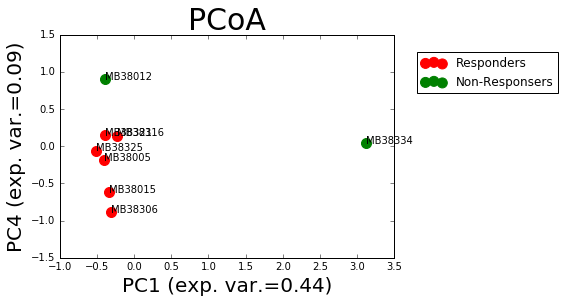

In [47]:
print featureDF.shape
featureDF_scaled = featureDF / featureDF.sum()
featureDF_scaled = featureDF_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_scaled:
    featureDF_scaled[col]=featureDF_scaled[col].fillna(featureDF_scaled[col].median())
    if featureDF_scaled[col].dtype != 'float64':
        print col,featureDF_scaled[col].dtype

df=featureDF_scaled
metric='euclidean'

sample_list_list=[('Responders',['MB38015','MB38005','MB38316','MB38306','MB38325','MB38321']),
                 ('Non-Responsers',['MB38012','MB38334'])]
# no treatment: 'MB38011ravid2'


color_list=['red','green']
pcoa_n1_toplot=0
pcoa_n2_toplot=3
        
pcoa_df,fig,ax= calc_PCoA(df,metric,sample_list_list,color_list,pcoa_n1_toplot=pcoa_n1_toplot,
                  pcoa_n2_toplot=pcoa_n2_toplot,toScale=False,toAnnotate=True)

        
plt.show()

#### by cancer type::

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

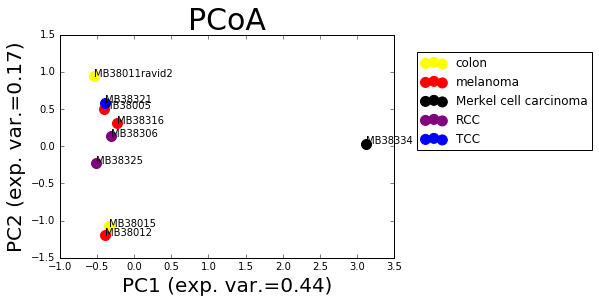

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

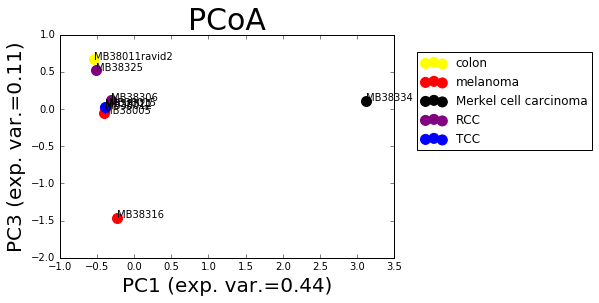

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

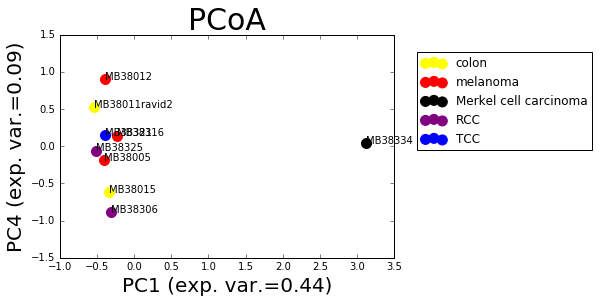

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

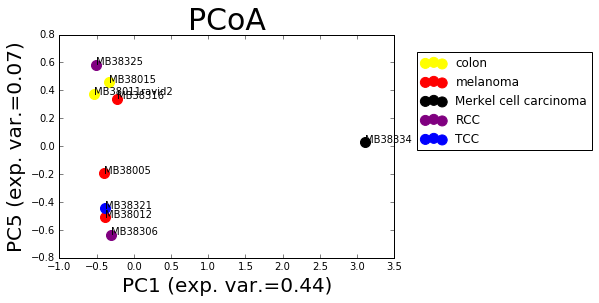

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

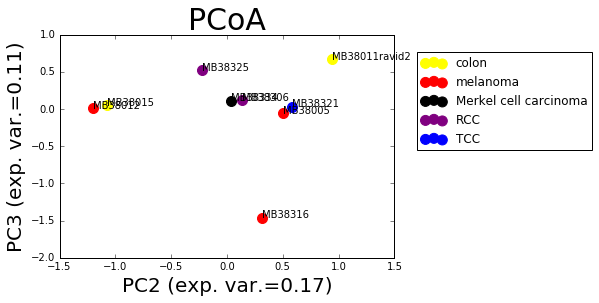

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

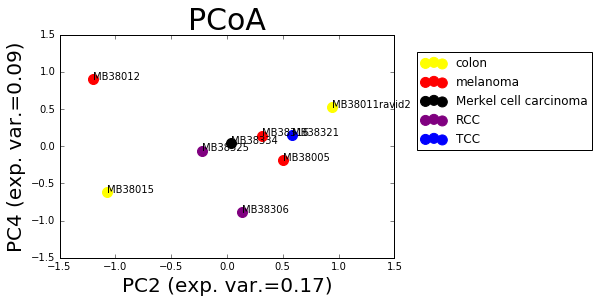

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

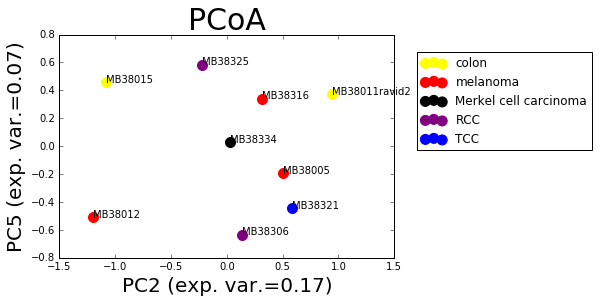

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

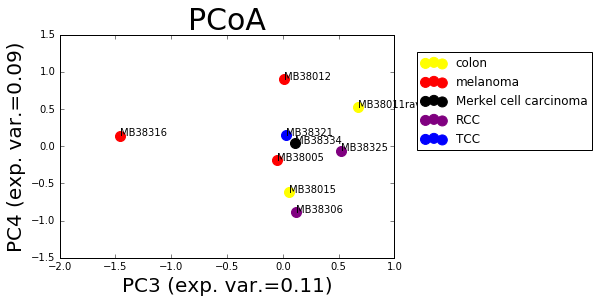

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

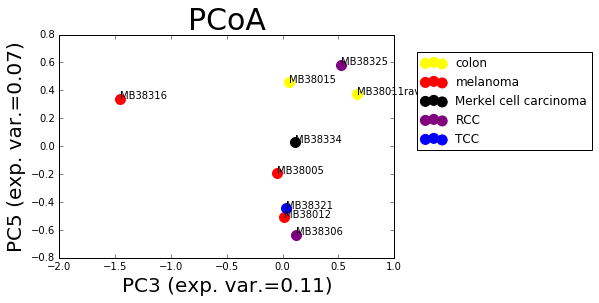

generating distance matrix...
generating condensed distance matrix using euclidean
top similar pairs:
        dist  sample1        sample2
1   1.353197  MB38321        MB38005
15  1.607157  MB38005        MB38306
6   1.632511  MB38321  MB38011ravid2
2   1.647089  MB38321        MB38306
8   1.711791  MB38325        MB38005
19  1.731375  MB38005  MB38011ravid2
12  1.750946  MB38325        MB38015
0   1.766191  MB38321        MB38325
9   1.818978  MB38325        MB38306
13  1.846650  MB38325  MB38011ravid2
generating squareform distance matrix using euclidean
calculate PCoA
                      0         1         2         3         4         5         6         7    8
MB38321       -0.387557  0.584659  0.029813  0.146279 -0.446410  0.004783 -0.298207 -0.701408  0.0
MB38325       -0.513833 -0.226990  0.519281 -0.062018  0.584759  0.780992 -0.037192 -0.047339  0.0
MB38005       -0.402953  0.503640 -0.053103 -0.189100 -0.192806 -0.039580 -0.708292  0.511248  0.0
MB38306       -0.310891  0

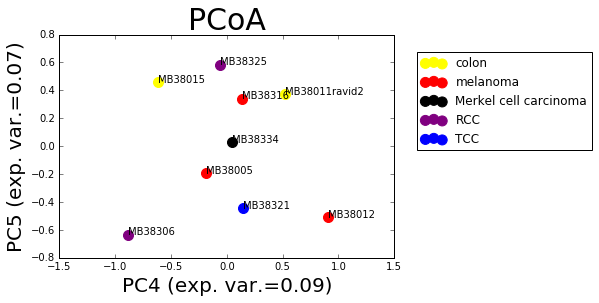

In [42]:
featureDF_scaled = featureDF / featureDF.sum()
featureDF_scaled = featureDF_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_scaled:
    featureDF_scaled[col]=featureDF_scaled[col].fillna(featureDF_scaled[col].median())
    if featureDF_scaled[col].dtype != 'float64':
        print col,featureDF_scaled[col].dtype

df=featureDF_scaled
metric='euclidean'

sample_list_list=[('colon',['MB38015','MB38011ravid2']),('melanoma',['MB38005','MB38316','MB38012']),
                  ('Merkel cell carcinoma',['MB38334']),
                  ('RCC',['MB38306','MB38325']),('TCC',['MB38321'])]
             
color_list=['yellow','red','black','purple','blue','green']

for i in range(5):
    for j in range(i+1,5):

        pcoa_n1_toplot=i
        pcoa_n2_toplot=j

        pcoa_df,fig,ax= calc_PCoA(df,metric,sample_list_list,color_list,pcoa_n1_toplot=pcoa_n1_toplot,
                                  pcoa_n2_toplot=pcoa_n2_toplot,toScale=False,toAnnotate=True)

        plt.show()

# repeat the analysis for all samples, including replicates
the goal is to generate two tables: feature table + TCRdf, as per Ravid's request from Feb 25th

## generate feature DF:

In [ ]:
datasetFolder='%s/TCR_real_data/RavidSamples_incReplicates' %MyPath
datasetName='RavidSamples_incReplicates'

complete_TCRfeatureExtractionForDataset(datasetFolder,datasetName, ss=None,repeat=None,samp_size_nt=400,samp_size_aa=200)


In [ ]:
featureDF_incReps=pd.read_excel('%s/TCR_real_data/RavidSamples_incReplicates/featureSummaryDFs/RavidSamples_incReplicates_allFeatures.xlsx' %MyPath)
featureDF_incReps.head()

In [ ]:
featureDF_incReps.describe()

In [ ]:
# remove columns with more than 50% nan values:
cols_to_use=featureDF_incReps.count()[featureDF_incReps.count()>=7].index.tolist()
print len(cols_to_use)

In [ ]:
print featureDF_incReps.shape
featureDF_incReps=featureDF_incReps.loc[:,cols_to_use]
print featureDF_incReps.shape

In [ ]:
# fill nan values with 0 in cols which are not topX or norm
cols_to_fill=[col for col in featureDF_incReps.columns if ('norm' not in col) and ('top' not in col)]

print len(cols_to_fill)

In [ ]:
for col in cols_to_fill:
    featureDF_incReps[col]=featureDF_incReps[col].fillna(0)

In [ ]:
featureDF_incReps.to_excel('%s/TCR_real_data/RavidSamples_incReplicates/featureSummaryDFs/RavidSamples_incReplicates_allFeatures_edited.xlsx' %MyPath)

## Generate all unique seqs

In [ ]:
dataset_folder='%s/TCR_real_data/RavidSamples_incReplicates' %MyPath
datasetName='RavidSamples_incReplicates'
minNsharedList=[2]
# sampleList=['MB38306','MB38334','Ravid1','MB38325','MB38316','MB38005','MB38321',
# 'MB38015','Ravid2','MB38012']
# sampleListName='RavidSamples'
sampleList=None
sampleListName=None

gen_sharingMatrix_perDataset(datasetName, dataset_folder, minNsharedList, sampleList=sampleList, sampleListName=sampleListName, extractUniqueAA=True, getSharingStatistics=True, onlyProductive=True)
   

## annotation features:

In [ ]:
### need to generate AllUniqueSequneces file first!
###need to define sample List
sampleList=['MB38005','MB38005ravid1','MB38005rep','MB38011ravid2','MB38012','MB38015','MB38015rep','MB38306',
            'MB38316','MB38321','MB38325','MB38325rep','MB38334','MB38334rep']
sampleListName='RavidSamples_incReps'
datasetFolder='%s/TCR_real_data/RavidSamples_incReplicates' %MyPath
datasetName='RavidSamples_incReplicates'
gen_annotation_features_for_dataset(datasetFolder,datasetName,sampleList,sampleListName)

In [ ]:
annot_incReps=pd.read_pickle('%s/TCR_real_data/RavidSamples_incReplicates/sharingAnalysis/AllUniqueWithCountsAndAnnotations' %MyPath)
annot_incReps.head()

## combine TCR features and annotation features:

In [ ]:
annotDF_incReps=pd.read_excel('%s/TCR_real_data/RavidSamples_incReplicates/annotationFeatures/\
RavidSamples_incReplicates_RavidSamples_incReps_annotationFeatures.xlsx' %MyPath).fillna(0)
annotDF_incReps_rels=annotDF_incReps.loc[:,[col for col in annotDF_incReps.columns if 'rel' in col]]
print annotDF_incReps.shape
print annotDF_incReps_rels.shape

In [ ]:
annotDF_incReps_rels

In [ ]:
featureDF_withAnnots_incReps=pd.merge(featureDF_incReps,annotDF_incReps_rels,how='outer',left_index=True,right_index=True)
print featureDF_incReps.shape
print featureDF_incReps.index.sort_values().tolist()
print annotDF_incReps_rels.shape
print annotDF_incReps_rels.index.sort_values().tolist()
print featureDF_withAnnots_incReps.shape
print featureDF_withAnnots_incReps.index.sort_values().tolist()

featureDF_withAnnots_incReps.head()

In [ ]:
featureDF_withAnnots_incReps.to_excel('%s/TCR_real_data/RavidSamples_incReplicates/featureSummaryDFs/RavidSamples_incReplicates_allFeatures_edited_withRels.xlsx' %MyPath)

## generate TCRdf for productive sequences and plot sample clustering by sequence matrix:

In [ ]:
AllUniqueWithCounts_incReps=pd.read_pickle('%s/TCR_real_data/RavidSamples_incReplicates/sharingAnalysis/AllUniqueWithCounts' %MyPath)
AllUniqueWithCounts_incReps.head()

In [ ]:
metric='jaccard'
nShared=2
seqFontSize='large'
figsize=(40,15)

print AllUniqueWithCounts_incReps.shape
prod=AllUniqueWithCounts_incReps[(AllUniqueWithCounts_incReps['nShared']>=nShared) & (AllUniqueWithCounts_incReps['prod_stat']==1)]
print prod.shape
TCRdf=prod.reset_index().pivot(index='Sample',columns='index', values='frequencyCount (%)').fillna(0)
print TCRdf.shape
print TCRdf.head()

TCRdf_binary=(TCRdf>0).astype(int)
print TCRdf_binary.iloc[:4,:4]

TCRdf_binary.to_excel('%s/TCR_real_data/RavidSamples_incReplicates/sharingAnalysis/TCRdf_prod_minShared%s_binary.xlsx' %(MyPath,nShared))
TCRdf_binary.to_pickle('%s/TCR_real_data/RavidSamples_incReplicates/sharingAnalysis/TCRdf_prod_minShared%s_binary.dat' %(MyPath,nShared))

## calculate sample clustering by TCRdf load:
g=sns.clustermap(data=TCRdf_binary, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/sampleClusteringBySharedProdSeqs_nShared%s_metric%s.png' %(MyPath,nShared,metric))
print TCRdf_binary.sum(axis=1)



In [ ]:
## calculate sample clustering by TCR features
metric='correlation'
seqFontSize='xx-small'
figsize=(40,12)

## normalize matrix:
featureDF_incReps_scaled = featureDF_incReps / featureDF_incReps.sum()
featureDF_incReps_scaled = featureDF_incReps_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_incReps_scaled:
    featureDF_incReps_scaled[col]=featureDF_incReps_scaled[col].fillna(featureDF_incReps_scaled[col].median())
    if featureDF_incReps_scaled[col].dtype != 'float64':
        print col,featureDF_incReps_scaled[col].dtype

# print featureDF_incReps_scaled[featureDF_incReps_scaled.isnull().any(axis=1)]
print featureDF_incReps_scaled.loc[:, featureDF_incReps_scaled.isna().any()]



g2=sns.clustermap(data=featureDF_incReps_scaled, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g2.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g2.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g2.savefig('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/sampleClusteringByTCRfeatures_%s.png' %(MyPath,metric))


In [ ]:
## calculate sample clustering by TCR features - only T 
metric='correlation'
seqFontSize='xx-small'
figsize=(40,12)

## normalize matrix:
Tcols=[col for col in featureDF_incReps.columns if '_T' in col]
print len(featureDF_incReps.columns)
print len(Tcols)

featureDF_incReps_Tonly=featureDF_incReps[Tcols]

featureDF_incReps_Tonly_scaled = featureDF_incReps_Tonly / featureDF_incReps_Tonly.sum()
# featureDF_incReps_Tonly_scaled = featureDF_incReps_Tonly_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_incReps_Tonly_scaled:
    featureDF_incReps_Tonly_scaled[col]=featureDF_incReps_Tonly_scaled[col].fillna(featureDF_incReps_Tonly_scaled[col].median())
    if featureDF_incReps_Tonly_scaled[col].dtype != 'float64':
        print col,featureDF_incReps_Tonly_scaled[col].dtype

# print featureDF_incReps_Tonly_scaled[featureDF_incReps_Tonly_scaled.isnull().any(axis=1)]
print featureDF_incReps_Tonly_scaled.loc[:, featureDF_incReps_Tonly_scaled.isna().any()]



g3=sns.clustermap(data=featureDF_incReps_Tonly_scaled, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g3.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g3.savefig('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/sampleClusteringByTCRfeatures_onlyT_%s.png' %(MyPath,metric))


In [ ]:
## calculate sample clustering by TCR features - only T - ***euclidean metric! ***
metric='euclidean'
seqFontSize='xx-small'
figsize=(40,12)

## normalize matrix:
Tcols=[col for col in featureDF_incReps.columns if '_T' in col]
print len(featureDF_incReps.columns)
print len(Tcols)

featureDF_incReps_Tonly=featureDF_incReps[Tcols]

featureDF_incReps_Tonly_scaled = featureDF_incReps_Tonly / featureDF_incReps_Tonly.sum()
# featureDF_incReps_Tonly_scaled = featureDF_incReps_Tonly_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_incReps_Tonly_scaled:
    featureDF_incReps_Tonly_scaled[col]=featureDF_incReps_Tonly_scaled[col].fillna(featureDF_incReps_Tonly_scaled[col].median())
    if featureDF_incReps_Tonly_scaled[col].dtype != 'float64':
        print col,featureDF_incReps_Tonly_scaled[col].dtype

# print featureDF_incReps_Tonly_scaled[featureDF_incReps_Tonly_scaled.isnull().any(axis=1)]
print featureDF_incReps_Tonly_scaled.loc[:, featureDF_incReps_Tonly_scaled.isna().any()]



g3=sns.clustermap(data=featureDF_incReps_Tonly_scaled, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g3.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g3.savefig('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/sampleClusteringByTCRfeatures_onlyT_%s.png' %(MyPath,metric))


In [ ]:
## calculate sample clustering by TCR features - only T + annot features
metric='correlation'
seqFontSize='xx-small'
figsize=(40,12)

## normalize matrix:
Tcols=[col for col in featureDF_incReps.columns if '_T' in col]
print len(featureDF_incReps.columns)
print len(Tcols)

featureDF_incReps_Tonly=featureDF_incReps[Tcols]

featureDF_incReps_Tonly_withRels=pd.merge(featureDF_incReps_Tonly,annotDF_incReps_rels.fillna(0),how='outer',left_index=True,right_index=True)
print ('featureDF_incReps_Tonly_withRels')
print featureDF_incReps_Tonly_withRels.shape
print featureDF_incReps_Tonly_withRels.head()

featureDF_incReps_Tonly_withRels_scaled = featureDF_incReps_Tonly_withRels / featureDF_incReps_Tonly_withRels.sum()
# featureDF_incReps_Tonly_withRels_scaled = featureDF_incReps_Tonly_withRels_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_incReps_Tonly_withRels_scaled:
    featureDF_incReps_Tonly_withRels_scaled[col]=featureDF_incReps_Tonly_withRels_scaled[col].fillna(featureDF_incReps_Tonly_withRels_scaled[col].median())
    if featureDF_incReps_Tonly_withRels_scaled[col].dtype != 'float64':
        print col,featureDF_incReps_Tonly_withRels_scaled[col].dtype

# print featureDF_incReps_Tonly_withRels_scaled[featureDF_incReps_Tonly_withRels_scaled.isnull().any(axis=1)]
print featureDF_incReps_Tonly_withRels_scaled.loc[:, featureDF_incReps_Tonly_withRels_scaled.isna().any()]



g4=sns.clustermap(data=featureDF_incReps_Tonly_withRels_scaled, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g4.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g4.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g4.savefig('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/sampleClusteringByTCRfeatures_onlyT_withRels_%s.png' %(MyPath,metric))


In [ ]:
## calculate sample clustering by TCR features - only T + annot features ####euclidean ####
metric='euclidean'
seqFontSize='xx-small'
figsize=(40,12)

## normalize matrix:
Tcols=[col for col in featureDF_incReps.columns if '_T' in col]
print len(featureDF_incReps.columns)
print len(Tcols)

featureDF_incReps_Tonly=featureDF_incReps[Tcols]

featureDF_incReps_Tonly_withRels=pd.merge(featureDF_incReps_Tonly,annotDF_incReps_rels.fillna(0),how='outer',left_index=True,right_index=True)
print ('featureDF_incReps_Tonly_withRels')
print featureDF_incReps_Tonly_withRels.shape
print featureDF_incReps_Tonly_withRels.head()

featureDF_incReps_Tonly_withRels_scaled = featureDF_incReps_Tonly_withRels / featureDF_incReps_Tonly_withRels.sum()
# featureDF_incReps_Tonly_withRels_scaled = featureDF_incReps_Tonly_withRels_scaled.drop('prod_stat_mean_0',axis=1)
for col in featureDF_incReps_Tonly_withRels_scaled:
    featureDF_incReps_Tonly_withRels_scaled[col]=featureDF_incReps_Tonly_withRels_scaled[col].fillna(featureDF_incReps_Tonly_withRels_scaled[col].median())
    if featureDF_incReps_Tonly_withRels_scaled[col].dtype != 'float64':
        print col,featureDF_incReps_Tonly_withRels_scaled[col].dtype

# print featureDF_incReps_Tonly_withRels_scaled[featureDF_incReps_Tonly_withRels_scaled.isnull().any(axis=1)]
print featureDF_incReps_Tonly_withRels_scaled.loc[:, featureDF_incReps_Tonly_withRels_scaled.isna().any()]



g4=sns.clustermap(data=featureDF_incReps_Tonly_withRels_scaled, method='average', metric=metric, z_score=None, standard_scale=None, figsize=figsize,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g4.ax_heatmap.get_yticklabels(), rotation=0,fontsize='xx-large')  # For y axis
plt.setp(g4.ax_heatmap.get_xticklabels(), rotation=90,fontsize=seqFontSize) # For x axis
plt.show()

g4.savefig('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/sampleClusteringByTCRfeatures_onlyT_withRels_%s.png' %(MyPath,metric))


## get top n seqs, their freqs and their identity - preliminary

In [ ]:
nTop=100
metric='correlation'

## calculate annot_incRepsation load per sample
df_list=[]
for sample in annot_incReps.Sample.unique():
    df=annot_incReps[(annot_incReps.Sample==sample)& (annot_incReps.prod_stat==1)]
    df=df.sort_values(by='frequencyCount (%)',ascending=False)
    df=df.iloc[:nTop,:]
#     print df.head()
    df_list.append(df)
    
top=pd.concat(df_list)

top.to_excel('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/top%s_perSample_withannot_incReps.xlsx' %(MyPath,nTop))

print top.shape
print top.head()

pivot=top.pivot_table(values='nShared',index='Sample', columns='combined annotation_list_clean', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print pivot


## calculate sample clustering by annot_incRepsation load:
g=sns.clustermap(data=pivot, method='average', metric=metric, z_score=None, standard_scale=None, figsize=None,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/top%s_perSample_withannot_incReps_clusteringby%s.png' %(MyPath,nTop,metric))

In [ ]:
nTop=100
metric='jaccard'

## calculate annot_incRepsation load per sample
df_list=[]
for sample in annot_incReps.Sample.unique():
    df=annot_incReps[(annot_incReps.Sample==sample)& (annot_incReps.prod_stat==1)]
    df=df.sort_values(by='frequencyCount (%)',ascending=False)
    df=df.iloc[:nTop,:]
#     print df.head()
    df_list.append(df)
    
top=pd.concat(df_list)

top.to_excel('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/top%s_perSample_withannot_incReps.xlsx' %(MyPath,nTop))

print top.shape
print top.head()

pivot=top.pivot_table(values='nShared',index='Sample', columns='combined annotation_list_clean', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print pivot


## calculate sample clustering by annot_incRepsation load:
g=sns.clustermap(data=pivot, method='average', metric=metric, z_score=None, standard_scale=None, figsize=None,
                   cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90) # For x axis
plt.show()

g.savefig('%s/TCR_real_data/RavidSamples_incReplicates/Analysis/top%s_perSample_withannot_incReps_clusteringby%s.png' %(MyPath,nTop,metric))

# MB - TCR associations:

## get all species that appear in 4 samples or more:

## generate clean species file:

In [ ]:
species=pd.read_excel(('%s/TCR_real_data/RavidSamples2/mbData_species.xlsx' %MyPath)).set_index('index')
print ('original species table shape:', species.shape)
print species.iloc[:4,7:12]

species_nan=species.replace(0,np.nan)
print 'species after replacement with nan:'
print species_nan.iloc[:4,7:12]

sample_cols=[col for col in species_nan.columns if 'MB' in col]
# print sample_cols
# species_nan['samples_count']=species_nan[sample_cols].count(axis=1)
# print 'top number of samples per species:'
# print species_nan['samples_count'].sort_values(ascending=False).head()

species_clean=species_nan.drop(['domain','phylum','class','order','family','genus','species'],axis=1).T
species_clean.to_excel('%s/TCR_real_data/RavidSamples2/Mb_TCR_analysis/OnlySpecies_clean.xlsx' %MyPath)

print ('species_clean.shape: ', species_clean.shape)
print species_clean.iloc[:,:4]


## get TCRdf_binary

In [ ]:
AllUniqueWithCounts=pd.read_pickle('%s/TCR_real_data/RavidSamples2/sharingAnalysis/AllUniqueWithCounts' %MyPath)
prod=AllUniqueWithCounts[(AllUniqueWithCounts['nShared']>=nShared) & (AllUniqueWithCounts['prod_stat']==1)]
TCRdf=prod.reset_index().pivot(index='Sample',columns='index', values='frequencyCount (%)').fillna(0)
TCRdf_binary=(TCRdf>0).astype(int)
print ('TCRdf_binary shape: ', TCRdf_binary.shape)
print TCRdf_binary.iloc[:4,:4]


## define function:

In [ ]:
the function analyze_tcr_Mb_relations was copied to TCR_microbiome_interactions_functions.py

## run for different cutoffs:

In [5]:
MBdf=species_clean
TCRdf_binary=TCRdf_binary
nShared_perSpecies=2
nShared_perTCR=2

summary_df=analyze_tcr_Mb_relations(MBdf,TCRdf_binary,nShared_perSpecies,nShared_perTCR)

summary_df.to_excel('%s/TCR_real_data/RavidSamples2/Mb_TCR_analysis/Mb_TCR_associations\
_nSharedSeq%s_nSharedSpecies%s.xlsx' %(MyPath,nShared_perTCR,nShared_perSpecies))
summary_df

NameError: name 'species_clean' is not defined

# compare all TCR features between groups:

In [48]:
AllUniqueWithCounts=pd.read_pickle('%s/TCR_real_data/RavidSamples2/sharingAnalysis/AllUniqueWithCounts' %MyPath)
prod=AllUniqueWithCounts[(AllUniqueWithCounts['nShared']>=nShared) & (AllUniqueWithCounts['prod_stat']==1)]
TCRdf=prod.reset_index().pivot(index='Sample',columns='index', values='frequencyCount (%)').fillna(0)
TCRdf_binary=(TCRdf>0).astype(int)
print ('TCRdf_binary shape: ', TCRdf_binary.shape)
print TCRdf_binary.iloc[:4,:4]


('TCRdf_binary shape: ', (9, 71))
index          CASRLSGAYNEQFF  CASSAGLAGYNEQFF  CASSEAGANTEAFF  CASSESYEQYF
Sample                                                                     
MB38005                     1                1               0            0
MB38011ravid2               1                0               1            1
MB38012                     0                0               0            0
MB38015                     0                0               0            0


In [ ]:
The function compare_TCR_between_groups was copied to Feature_Phenotype_Functions.py

## compare responders and non responders:

In [51]:
[('Responders',['MB38015','MB38005','MB38316','MB38306','MB38325','MB38321']),
                 ('Non-Responsers',['MB38012','MB38334'])]


    
sample_list1=['MB38015','MB38005','MB38316','MB38306','MB38325','MB38321']
groupName1='responders'
sample_list2=['MB38012','MB38334']
groupName2='Non Responders'
featureDF=featureDF_Tonly_withRels
TCRdf_binary=TCRdf_binary

feature_comparison_df,TCR_comparison_df=compare_TCR_between_groups(sample_list1,groupName1,sample_list2,groupName2,featureDF,TCRdf_binary)
print feature_comparison_df.head(20)
feature_comparison_df.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/TCR_feature_comparison_%s_%s.xlsx' %(MyPath,
                                                              groupName1,groupName2))
print ('')
print TCR_comparison_df.head(10)
TCR_comparison_df.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/TCR_seq_comparison_%s_%s.xlsx' %(MyPath,
                                                              groupName1,groupName2))

comparing features among sample groups
number of samples=241
0 V01_T
1 V02_T
2 V04_T
3 V05_T
4 V06_T
5 V07_T
6 V09_T
7 V10_T
8 V11_T
9 V12_T
10 V13_T
11 V14_T
12 V15_T
13 V16_T
14 V18_T
15 V19_T
16 V20_T
17 V21_T
18 V23_T
19 V25_T
20 V27_T
21 V28_T
22 V29_T
23 V30_T
24 D01_J01-01_T
25 D01_J01-02_T
26 D01_J01-04_T
27 D01_J01-05_T
28 D01_J01-06_T
29 D01_J02-01_T
30 D01_J02-02_T
31 D01_J02-03_T
32 D01_J02-04_T
33 D01_J02-05_T
34 D01_J02-06_T
35 D01_J02-07_T
36 D02_J01-01_T
37 D02_J01-02_T
38 D02_J01-04_T
39 D02_J01-05_T
40 D02_J01-06_T
41 D02_J02-01_T
42 D02_J02-02_T
43 D02_J02-03_T
44 D02_J02-04_T
45 D02_J02-05_T
46 D02_J02-06_T
47 D02_J02-07_T
48 V01_J02_T
49 V02_J01_T
50 V02_J02_T
51 V04_J01_T
52 V04_J02_T
53 V05_J01_T
54 V05_J02_T
55 V06_J01_T
56 V06_J02_T
57 V07_J01_T
58 V07_J02_T
59 V09_J01_T
60 V09_J02_T
61 V10_J01_T
62 V10_J02_T
63 V11_J01_T
64 V11_J02_T
65 V12_J01_T
66 V12_J02_T
67 V13_J01_T
68 V13_J02_T
69 V14_J01_T
70 V14_J02_T
71 V15_J01_T
72 V15_J02_T
73 V16_J01_T
74 V18_J01_


                 seqAbs_group0  seqAbs_group1  seqPres_group0  seqPres_group1  fisher_OR  fisher_p  fisher_p_Sig_Bonferroni  fisher_p_sigFDR=0.01  fisher_p_corrPval_DR0.01
CASSLGETQYF                2.0            2.0             4.0             0.0        0.0  0.428571                        0                     0                       1.0
CASSLGQQETQYF              3.0            2.0             3.0             0.0        0.0  0.464286                        0                     0                       1.0
CASSPGQVNEKLFF             5.0            1.0             1.0             1.0        5.0  0.464286                        0                     0                       1.0
CASSYRSSYEQYF              5.0            1.0             1.0             1.0        5.0  0.464286                        0                     0                       1.0
CASSVVVTGELFF              5.0            1.0             1.0             1.0        5.0  0.464286                        0                

,V01_T,V02_T,V04_T,V05_T,V06_T,V07_T,V09_T,V10_T,V11_T,V12_T,...,Colorectalcancer_rel_cum_freq(perc),RSV_rel_seq_count,RSV_rel_cum_freq(perc),RheumatoidArthritis_rel_seq_count,RheumatoidArthritis_rel_cum_freq(perc),SIV_rel_seq_count,SIV_rel_cum_freq(perc),WestNilevirus_rel_seq_count,WestNilevirus_rel_cum_freq(perc),group
MB38005,0.001779,0.034391,0.066410,0.143789,0.095464,0.166617,0.035280,0.047139,0.058405,0.006522,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Responders
MB38011ravid2,0.002716,0.043911,0.035310,0.142146,0.090086,0.196922,0.032594,0.044364,0.078769,0.010865,...,2.559181,2.272727,3.838772,2.272727,0.639795,2.272727,0.639795,2.272727,0.639795,Non Responders
MB38012,0.002169,0.045553,0.047722,0.164859,0.099783,0.149675,0.058568,0.019523,0.067245,0.013015,...,9.060433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Non Responders
MB38015,0.003552,0.023091,0.023091,0.145648,0.067496,0.152753,0.099467,0.037300,0.067496,0.012433,...,4.171072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Responders
MB38306,0.001054,0.041118,0.059041,0.144439,0.094887,0.157617,0.067475,0.023195,0.047443,0.016342,...,0.862122,0.000000,0.000000,1.470588,2.586367,0.000000,0.000000,0.000000,0.000000,Responders
MB38316,0.000000,0.050611,0.068063,0.146597,0.085515,0.188482,0.071553,0.024433,0.064572,0.005236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Responders
MB38321,0.001614,0.053792,0.056482,0.168908,0.089833,0.154922,0.044648,0.035503,0.045186,0.009145,...,0.000000,0.000000,0.000000,2.564103,1.886302,0.000000,0.000000,2.564103,3.772603,Responders
MB38325,0.003817,0.047710,0.042939,0.167939,0.104008,0.140267,0.041031,0.041031,0.058206,0.007634,...,0.000000,5.555556,17.140310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Responders
MB38334,0.003704,0.033333,0.107407,0.162963,0.096296,0.155556,0.051852,0.037037,0.055556,0.011111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Non Responders


               frequencyCount (%)_mean_T                    
                                     min       max      mean
group                                                       
Non Responders                  0.000276  0.215983  0.112786
Responders                      0.017848  0.109051  0.058429


               NT count_T                   
                      min   max         mean
group                                       
Non Responders        463  3620  1634.000000
Responders            917  5603  2575.666667


                J02-05_T                    
                     min       max      mean
group                                       
Non Responders  0.100951  0.155556  0.133947
Responders      0.086832  0.110812  0.097009




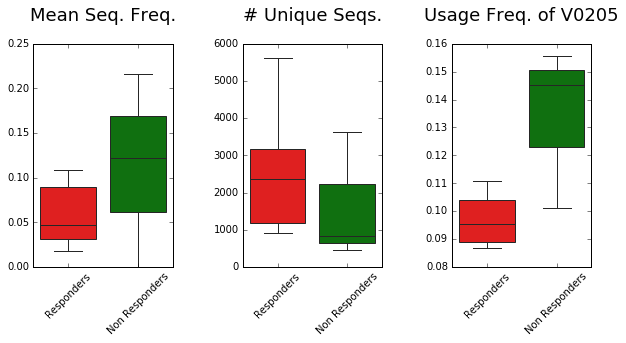

In [83]:
featureDF2=featureDF.copy()
featureDF2['group']=np.where(featureDF2.index.isin(sample_list1),'Responders','Non Responders')
featureDF2


feature_list=[('frequencyCount (%)_mean_T','Mean Seq. Freq.'),
              ('NT count_T','# Unique Seqs.'),
               ('J02-05_T','Usage Freq. of V0205')]

cmap=mpl.colors.ListedColormap(['red','green'], name='from_list', N=2)
mpl.cm.register_cmap('from_list', cmap)
cpal = sns.color_palette('from_list', n_colors=2)


# , n_colors=64, desat=0.2
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,4))
for n,item in enumerate(feature_list):
    
    
    col=item[0]
    name=item[1]
    ax=axes[n]
    print featureDF2[['group',col]].groupby('group').agg(['min','max','mean'])
    print ''
    print ''
    sns.boxplot(x=featureDF2['group'], y=featureDF2[col],ax=ax,palette=cpal)
    
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )   
    ax.set_xlabel('');ax.set_ylabel('')
#     mpl.rcParams['axes.titlepad']=10
    ax.set_title(item[1],fontsize=18,y=1.08)
#     if n!=2:
#         ax.set_yticks([0,20000,40000,60000,80000])
#         ax.set_ylim(0,90000)
#     ax.get_xticklabels()[2].set_color('red')
plt.subplots_adjust(wspace=0.5)
plt.show()
    
    

In [63]:
mpl.rcParams.keys()

[u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.html',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.axisbelow',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.axis',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelpad',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.prop_cycle',
 u'axes.spines.bottom',
 u'axes.spines.left',
 u'axes.spines.right',
 u'axes.spines.top',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',
 u'axes.xmargin',
 u'axes.ymargin',
 u'axes3d.grid',
 u'backend',
 u'backend.qt4',
 u'backend.qt5',
 u'backend_fallback',
 u'boxplot.bootstrap',
 u'boxplot.boxprops.color',
 u'boxplot.boxprops.linestyle',
 u'boxplot.boxprops.linewidth',
 u'boxplot.capprops.color',
 u'boxplot.capprops.linestyle',
 u'boxplot.capprops.linewidth',
 u'boxplot.flierprops.color',
 u'boxplot.flierprops.linestyle',
 u'boxplot.flierprops.linewidth',
 u'boxplot.flierprops.marker',
 u'boxplot.flierprops.markeredgecolor',
 u'boxplot.flierprops.markerfacecolor',
 u'boxplot.flierprops.markersize',
 u'boxplot.meanline',
 u'boxplot.meanprops.color',
 u'boxplot.meanprops.linestyle',
 u'boxplot.meanprops.linewidth',
 u'boxplot.medianprops.color',
 u'boxplot.medianprops.linestyle',
 u'boxplot.medianprops.linewidth',
 u'boxplot.notch',
 u'boxplot.patchartist',
 u'boxplot.showbox',
 u'boxplot.showcaps',
 u'boxplot.showfliers',
 u'boxplot.showmeans',
 u'boxplot.vertical',
 u'boxplot.whiskerprops.color',
 u'boxplot.whiskerprops.linestyle',
 u'boxplot.whiskerprops.linewidth',
 u'boxplot.whiskers',
 u'contour.corner_mask',
 u'contour.negative_linestyle',
 u'datapath',
 u'docstring.hardcopy',
 u'errorbar.capsize',
 u'examples.directory',
 u'figure.autolayout',
 u'figure.dpi',
 u'figure.edgecolor',
 u'figure.facecolor',
 u'figure.figsize',
 u'figure.frameon',
 u'figure.max_open_warning',
 u'figure.subplot.bottom',
 u'figure.subplot.hspace',
 u'figure.subplot.left',
 u'figure.subplot.right',
 u'figure.subplot.top',
 u'figure.subplot.wspace',
 u'figure.titlesize',
 u'figure.titleweight',
 u'font.cursive',
 u'font.family',
 u'font.fantasy',
 u'font.monospace',
 u'font.sans-serif',
 u'font.serif',
 u'font.size',
 u'font.stretch',
 u'font.style',
 u'font.variant',
 u'font.weight',
 u'grid.alpha',
 u'grid.color',
 u'grid.linestyle',
 u'grid.linewidth',
 u'image.aspect',
 u'image.cmap',
 u'image.composite_image',
 u'image.interpolation',
 u'image.lut',
 u'image.origin',
 u'image.resample',
 u'interactive',
 u'keymap.all_axes',
 u'keymap.back',
 u'keymap.forward',
 u'keymap.fullscreen',
 u'keymap.grid',
 u'keymap.home',
 u'keymap.pan',
 u'keymap.quit',
 u'keymap.save',
 u'keymap.xscale',
 u'keymap.yscale',
 u'keymap.zoom',
 u'legend.borderaxespad',
 u'legend.borderpad',
 u'legend.columnspacing',
 u'legend.edgecolor',
 u'legend.facecolor',
 u'legend.fancybox',
 u'legend.fontsize',
 u'legend.framealpha',
 u'legend.frameon',
 u'legend.handleheight',
 u'legend.handlelength',
 u'legend.handletextpad',
 u'legend.isaxes',
 u'legend.labelspacing',
 u'legend.loc',
 u'legend.markerscale',
 u'legend.numpoints',
 u'legend.scatterpoints',
 u'legend.shadow',
 u'lines.antialiased',
 u'lines.color',
 u'lines.dash_capstyle',
 u'lines.dash_joinstyle',
 u'lines.linestyle',
 u'lines.linewidth',
 u'lines.marker',
 u'lines.markeredgewidth',
 u'lines.markersize',
 u'lines.solid_capstyle',
 u'lines.solid_joinstyle',
 u'markers.fillstyle',
 u'mathtext.bf',
 u'mathtext.cal',
 u'mathtext.default',
 u'mathtext.fallback_to_cm',
 u'mathtext.fontset',
 u'mathtext.it',
 u'mathtext.rm',
 u'mathtext.sf',
 u'mathtext.tt',
 u'nbagg.transpar

## compare Melanoma and non-melanoma

In [87]:
sample_list_list=[('colon',['MB38015','MB38011ravid2']),('melanoma',['MB38005','MB38316','MB38012']),
                  ('Merkel cell carcinoma',['MB38334']),
                  ('RCC',['MB38306','MB38325']),('TCC',['MB38321'])]


sample_list1=['MB38005','MB38316','MB38012']
groupName1='Melanoma'
sample_list2=['MB38015','MB38011ravid2','MB38334','MB38306','MB38325','MB38321']
groupName2='Non Melanoma'
featureDF=featureDF_Tonly_withRels
TCRdf_binary=TCRdf_binary

feature_comparison_df,TCR_comparison_df=compare_TCR_between_groups(sample_list1,groupName1,sample_list2,groupName2,featureDF,TCRdf_binary)
print feature_comparison_df.head(20)
feature_comparison_df.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/TCR_feature_comparison_%s_%s.xlsx' %(MyPath,
                                                              groupName1,groupName2))
print ('')
print TCR_comparison_df.head(10)
TCR_comparison_df.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/TCR_seq_comparison_%s_%s.xlsx' %(MyPath,
                                                              groupName1,groupName2))

comparing features among sample groups
number of samples=241
0 V01_T
1 V02_T
2 V04_T
3 V05_T
4 V06_T
5 V07_T
6 V09_T
7 V10_T
8 V11_T
9 V12_T
10 V13_T
11 V14_T
12 V15_T
13 V16_T
14 V18_T
15 V19_T
16 V20_T
17 V21_T
18 V23_T
19 V25_T
20 V27_T
21 V28_T
22 V29_T
23 V30_T
24 D01_J01-01_T
25 D01_J01-02_T
26 D01_J01-04_T
27 D01_J01-05_T
28 D01_J01-06_T
29 D01_J02-01_T
30 D01_J02-02_T
31 D01_J02-03_T
32 D01_J02-04_T
33 D01_J02-05_T
34 D01_J02-06_T
35 D01_J02-07_T
36 D02_J01-01_T
37 D02_J01-02_T
38 D02_J01-04_T
39 D02_J01-05_T
40 D02_J01-06_T
41 D02_J02-01_T
42 D02_J02-02_T
43 D02_J02-03_T
44 D02_J02-04_T
45 D02_J02-05_T
46 D02_J02-06_T
47 D02_J02-07_T
48 V01_J02_T
49 V02_J01_T
50 V02_J02_T
51 V04_J01_T
52 V04_J02_T
53 V05_J01_T
54 V05_J02_T
55 V06_J01_T
56 V06_J02_T
57 V07_J01_T
58 V07_J02_T
59 V09_J01_T
60 V09_J02_T
61 V10_J01_T
62 V10_J02_T
63 V11_J01_T
64 V11_J02_T
65 V12_J01_T
66 V12_J02_T
67 V13_J01_T
68 V13_J02_T
69 V14_J01_T
70 V14_J02_T
71 V15_J01_T
72 V15_J02_T
73 V16_J01_T
74 V18_J01_

             prod_stat_mean_T                    
                          min       max      mean
group                                            
Melanoma             0.803419  0.842406  0.820164
Non Melanoma         0.730022  0.796948  0.757731


             normSeqNums_per400_NT_T                   
                                 min    max        mean
group                                                  
Melanoma                       378.3  392.5  385.866667
Non Melanoma                   294.9  382.8  355.383333


                 V23_T                    
                   min       max      mean
group                                     
Melanoma      0.004338  0.005236  0.004773
Non Melanoma  0.006338  0.012405  0.009389


             Celiacdisease_rel_cum_freq(perc)                     
                                          min        max      mean
group                                                             
Melanoma                               2.9409  1

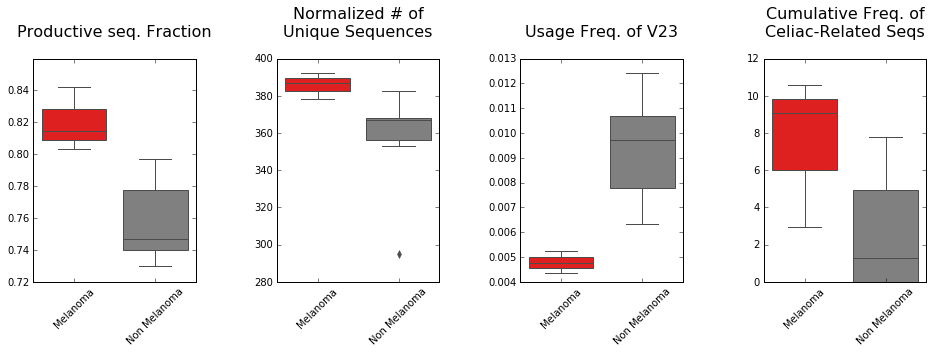

In [95]:
featureDF3=featureDF.copy()
featureDF3['group']=np.where(featureDF3.index.isin(sample_list1),groupName1,groupName2)
featureDF3

feature_list=[('prod_stat_mean_T','Productive seq. Fraction'),
              ('normSeqNums_per400_NT_T','Normalized # of\nUnique Sequences'),
              ('V23_T','Usage Freq. of V23'),
               ('Celiacdisease_rel_cum_freq(perc)','Cumulative Freq. of\nCeliac-Related Seqs')]

cmap=mpl.colors.ListedColormap(['red','grey'], name='from_list', N=2)
mpl.cm.register_cmap('from_list', cmap)
cpal = sns.color_palette('from_list', n_colors=2)


# , n_colors=64, desat=0.2
fig,axes=plt.subplots(nrows=1,ncols=len(feature_list),figsize=(4*len(feature_list),4))
for n,item in enumerate(feature_list):
    
    
    col=item[0]
    name=item[1]
    ax=axes[n]
    print featureDF3[['group',col]].groupby('group').agg(['min','max','mean'])
    print ''
    print ''
    sns.boxplot(x=featureDF3['group'], y=featureDF3[col],ax=ax,palette=cpal)
    
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )   
    ax.set_xlabel('');ax.set_ylabel('')
#     mpl.rcParams['axes.titlepad']=10
    ax.set_title(item[1],fontsize=16,y=1.08)
#     if n!=2:
#         ax.set_yticks([0,20000,40000,60000,80000])
#         ax.set_ylim(0,90000)
#     ax.get_xticklabels()[2].set_color('red')
plt.subplots_adjust(wspace=0.5)
plt.show()
    
    

## compare colon and non colon:

In [ ]:
sample_list_list=[('colon',['MB38015','MB38011ravid2']),('melanoma',['MB38005','MB38316','MB38012']),
                  ('Merkel cell carcinoma',['MB38334']),
                  ('RCC',['MB38306','MB38325']),('TCC',['MB38321'])]


sample_list1=['MB38015','MB38011ravid2']
groupName1='Colon'
sample_list2=['MB38005','MB38316','MB38012','MB38334','MB38306','MB38325','MB38321']
groupName2='Non Colon'
featureDF=featureDF_Tonly_withRels
TCRdf_binary=TCRdf_binary

feature_comparison_df,TCR_comparison_df=compare_TCR_between_groups(sample_list1,groupName1,sample_list2,groupName2,featureDF,TCRdf_binary)
print feature_comparison_df.head(10)
feature_comparison_df.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/TCR_feature_comparison_%s_%s.xlsx' %(MyPath,
                                                              groupName1,groupName2))
print ('')
print TCR_comparison_df.head(10)
TCR_comparison_df.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/TCR_seq_comparison_%s_%s.xlsx' %(MyPath,
                                                              groupName1,groupName2))

## compare rcc and non rcc

In [98]:
sample_list_list=[('colon',['MB38015','MB38011ravid2']),('melanoma',['MB38005','MB38316','MB38012']),
                  ('Merkel cell carcinoma',['MB38334']),
                  ('RCC',['MB38306','MB38325']),('TCC',['MB38321'])]


sample_list1=['MB38306','MB38325']
groupName1='RCC'
sample_list2=['MB38005','MB38316','MB38012','MB38334','MB38015','MB38011ravid2','MB38321']
groupName2='Non RCC'
featureDF=featureDF_Tonly_withRels
TCRdf_binary=TCRdf_binary

feature_comparison_df,TCR_comparison_df=compare_TCR_between_groups(sample_list1,groupName1,sample_list2,groupName2,featureDF,TCRdf_binary)
print feature_comparison_df.head(20)
feature_comparison_df.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/TCR_feature_comparison_%s_%s.xlsx' %(MyPath,
                                                              groupName1,groupName2))
print ('')
print TCR_comparison_df.head(10)
TCR_comparison_df.to_excel('%s/TCR_real_data/RavidSamples2/Analysis/TCR_seq_comparison_%s_%s.xlsx' %(MyPath,
                                                              groupName1,groupName2))

comparing features among sample groups
number of samples=241
0 V01_T
1 V02_T
2 V04_T
3 V05_T
4 V06_T
5 V07_T
6 V09_T
7 V10_T
8 V11_T
9 V12_T
10 V13_T
11 V14_T
12 V15_T
13 V16_T
14 V18_T
15 V19_T
16 V20_T
17 V21_T
18 V23_T
19 V25_T
20 V27_T
21 V28_T
22 V29_T
23 V30_T
24 D01_J01-01_T
25 D01_J01-02_T
26 D01_J01-04_T
27 D01_J01-05_T
28 D01_J01-06_T
29 D01_J02-01_T
30 D01_J02-02_T
31 D01_J02-03_T
32 D01_J02-04_T
33 D01_J02-05_T
34 D01_J02-06_T
35 D01_J02-07_T
36 D02_J01-01_T
37 D02_J01-02_T
38 D02_J01-04_T
39 D02_J01-05_T
40 D02_J01-06_T
41 D02_J02-01_T
42 D02_J02-02_T
43 D02_J02-03_T
44 D02_J02-04_T
45 D02_J02-05_T
46 D02_J02-06_T
47 D02_J02-07_T
48 V01_J02_T
49 V02_J01_T
50 V02_J02_T
51 V04_J01_T
52 V04_J02_T
53 V05_J01_T
54 V05_J02_T
55 V06_J01_T
56 V06_J02_T
57 V07_J01_T
58 V07_J02_T
59 V09_J01_T
60 V09_J02_T
61 V10_J01_T
62 V10_J02_T
63 V11_J01_T
64 V11_J02_T
65 V12_J01_T
66 V12_J02_T
67 V13_J01_T
68 V13_J02_T
69 V14_J01_T
70 V14_J02_T
71 V15_J01_T
72 V15_J02_T
73 V16_J01_T
74 V18_J01_

         V06-07_T                    
              min       max      mean
group                                
Non RCC  0.000000  0.001776  0.000771
RCC      0.001908  0.002109  0.002008


        cdr3Length_max_T               
                     min max       mean
group                                  
Non RCC               66  79  71.714286
RCC                   80  81  80.500000


        CMV_rel_seq_count                      
                      min        max       mean
group                                          
Non RCC          0.000000  27.272727  19.387850
RCC             29.411765  38.888889  34.150327




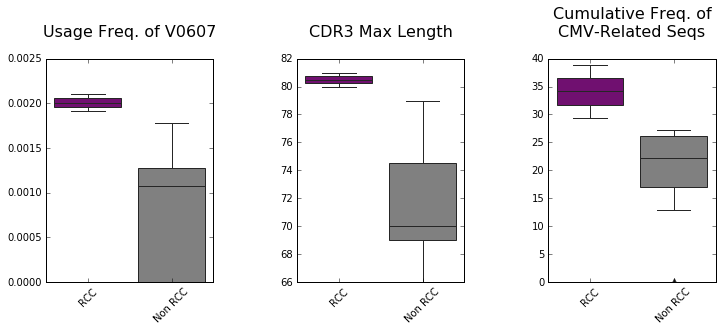

In [100]:
featureDF4=featureDF.copy()
featureDF4['group']=np.where(featureDF4.index.isin(sample_list1),groupName1,groupName2)
featureDF4

feature_list=[('V06-07_T','Usage Freq. of V0607'),
              ('cdr3Length_max_T','CDR3 Max Length'),
              ('CMV_rel_seq_count','Cumulative Freq. of\nCMV-Related Seqs')]

cmap=mpl.colors.ListedColormap(['purple','grey'], name='from_list', N=2)
mpl.cm.register_cmap('from_list', cmap)
cpal = sns.color_palette('from_list', n_colors=2)


# , n_colors=64, desat=0.2
fig,axes=plt.subplots(nrows=1,ncols=len(feature_list),figsize=(4*len(feature_list),4))
for n,item in enumerate(feature_list):
    
    
    col=item[0]
    name=item[1]
    ax=axes[n]
    print featureDF4[['group',col]].groupby('group').agg(['min','max','mean'])
    print ''
    print ''
    sns.boxplot(x=featureDF4['group'], y=featureDF4[col],ax=ax,palette=cpal,order=[groupName1,groupName2])
    
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )   
    ax.set_xlabel('');ax.set_ylabel('')
#     mpl.rcParams['axes.titlepad']=10
    ax.set_title(item[1],fontsize=16,y=1.08)
#     if n!=2:
#         ax.set_yticks([0,20000,40000,60000,80000])
#         ax.set_ylim(0,90000)
#     ax.get_xticklabels()[2].set_color('red')
plt.subplots_adjust(wspace=0.5)
plt.show()
    
    

# for QC slide:

In [ ]:
qc=pd.read_excel('%s/TCR_real_data/QC/QCforRavidPPT.xlsx' %MyPath)
qc.head()

In [ ]:
qc2=qc.drop(['origiank name','INDEX','Run ID','QC Status'],axis=1).set_index('edited name')
qc2.head()

In [ ]:
qc2[qc2.index.str.contains('IZ')]

In [ ]:
qc2['group']=np.where(qc2.index.str.contains('BD'),'Healthy blood',np.where(qc2.index.str.contains('IZ'),'Melanoma Samples','Merck Project'))
qc2.head()

In [ ]:
qc2['group'].value_counts(dropna=False)

In [ ]:
var_list=[('total_templates','# Sequences'),
           ('total_rearrangements','# Unique Sequences'),
            ('% On-target','% On-target')]

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,4))
for n,item in enumerate(var_list):
    
    
    col=item[0]
    name=item[1]
    ax=axes[n]
    print qc2[['group',col]].groupby('group').agg(['min','max','mean'])
    sns.boxplot(x=qc2['group'], y=qc2[col],ax=ax,palette="Set2")
    
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )   
    ax.set_xlabel('');ax.set_ylabel('')
    ax.set_title(item[1],fontsize=18)
    if n!=2:
        ax.set_yticks([0,20000,40000,60000,80000])
        ax.set_ylim(0,90000)
    ax.get_xticklabels()[2].set_color('red')
plt.subplots_adjust(wspace=0.5)
plt.show()
    
    

# old stuff:

## compare features to PNP530

In [ ]:
data_folder1='TCR_real_data'
datasetName1='PNP530'
data_folder2='TCR_real_data/RavidSamples2'
datasetName2='RavidSamples'

compare_features_between_datasets(data_folder1, datasetName1,  data_folder2, datasetName2,TakeSameSamples=False, 
                                      filteringList1=None,filteringList2=None,filteringList1Name=None,
                                      filteringList2Name=None,MatchedFolderToSave=None)